In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import json, os, glob, re

import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{amssymb}']

from matplotlib import rc
rc("text", usetex=False)

/tmp/ipykernel_169840/50486362.py:9: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble'] = [


In [2]:
path = 'summary_new_cifar10/'

list_dir = []

for file in glob.glob(path + '*.json'):
    with open(file) as f:
        data = json.load(f)
        list_dir.append(data)
        
df = pd.DataFrame(list_dir)
print(df.columns)
df

Index(['dataset', 'extractor', 'transformation_type', 'alpha', 'lamda',
       'k_percent_of_og_size', 'seed', 'transform_train_accuracy',
       'transform_test_accuracy', 'z_train_accuracy_sp_corr',
       'z_indist_accuracy_sp_corr', 'z_ood_accuracy_sp_corr',
       'z_train_og_no_sp_corr', 'z_test_og_no_sp_corr',
       'z_test_transf_no_sp_corr', 'all_f_train_accuracy_sp_corr',
       'all_f_indist_accuracy_sp_corr', 'all_f_ood_accuracy_sp_corr',
       'all_f_train_og_no_sp_corr', 'all_f_og_no_sp_corr',
       'all_f_transf_no_sp_corr', 'no_f0_train_accuracy_sp_corr',
       'no_f0_indist_accuracy_sp_corr', 'no_f0_ood_accuracy_sp_corr',
       'no_f0_train_og_no_sp_corr', 'no_f0_og_no_sp_corr',
       'no_f0_transf_no_sp_corr', 'delta_special', 'delta_ns_mean',
       'delta_ns_max', 'corr_special', 'corr_ns_mean', 'corr_ns_max'],
      dtype='object')


,dataset,extractor,transformation_type,alpha,lamda,k_percent_of_og_size,seed,transform_train_accuracy,transform_test_accuracy,z_train_accuracy_sp_corr,...,no_f0_ood_accuracy_sp_corr,no_f0_train_og_no_sp_corr,no_f0_og_no_sp_corr,no_f0_transf_no_sp_corr,delta_special,delta_ns_mean,delta_ns_max,corr_special,corr_ns_mean,corr_ns_max
0,cifar10,simclr,rotated,0.90,1,0.95,1,0.99031,0.98985,0.79642,...,0.6969,0.81264,0.8057,0.6678,2.563739,1.240989,1.310777,0.901082,0.008280,0.412742
1,cifar10,simclr,contrasted,0.90,1,0.95,6,0.95483,0.95580,0.83078,...,0.7958,0.81590,0.8079,0.7969,4.220745,1.157609,1.503412,0.838165,0.009152,0.153629
2,cifar10,simclr,blurred,0.90,1,0.95,6,0.83679,0.83940,0.82796,...,0.7687,0.81592,0.8089,0.7878,4.036928,1.212335,1.769012,0.686103,0.017679,0.202807
3,cifar10,resnet,contrasted,0.75,0,0.95,2,0.99024,0.98985,0.84452,...,0.7856,0.88040,0.8655,0.6154,5.700131,1.311801,3.489233,0.926939,0.014640,0.696771
4,cifar10,simclr,saturated,1.00,0,0.95,6,0.85884,0.85700,0.83218,...,0.7477,0.81690,0.8083,0.7918,1.723764,1.069714,1.229325,0.675027,0.020169,0.248917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,cifar10,simclr,rotated,0.50,1,0.95,4,0.99031,0.98985,0.76392,...,0.7500,0.81264,0.8057,0.6678,2.563739,1.240989,1.310777,0.901082,0.008280,0.412742
956,cifar10,resnet,blurred,0.99,1,0.95,4,0.84632,0.84875,0.88158,...,0.8212,0.88012,0.8657,0.8146,3.697424,1.281198,1.386356,0.707989,0.010521,0.153545
957,cifar10,simclr,saturated,1.00,0,0.95,8,0.85884,0.85700,0.83218,...,0.7477,0.81690,0.8083,0.7918,1.723764,1.069714,1.229325,0.675027,0.020169,0.248917
958,cifar10,simclr,saturated,0.95,0,0.95,3,0.85884,0.85700,0.82674,...,0.7598,0.81690,0.8083,0.7918,1.723764,1.069714,1.229325,0.675027,0.020169,0.248917


# Correlations Table

In [3]:
keys = ['dataset','extractor','transformation_type','alpha', 'lamda']
measure = ['corr_special', 'corr_ns_mean', 'corr_ns_max']
variables = {}
for index in measure:
    variables[index] = ['mean', 'std']
summary = df.groupby(keys, as_index=False).agg(variables)
summary_lamda0 = summary[summary.lamda==0]
summary_lamda1 = summary[summary.lamda==1]

resnet_summary_lamda0 = summary_lamda0[summary_lamda0.extractor == 'resnet']
simclr_summary_lamda0 = summary_lamda0[summary_lamda0.extractor == 'simclr']
resnet_summary_lamda1 = summary_lamda1[summary_lamda1.extractor == 'resnet']
simclr_summary_lamda1 = summary_lamda1[summary_lamda1.extractor == 'simclr']


display(resnet_summary_lamda0)
display(simclr_summary_lamda0)
display(simclr_summary_lamda1)
display(resnet_summary_lamda1)

dataset extractor transformation_type alpha lamda corr_special       \
                                                              mean  std   
0   cifar10    resnet             blurred  0.50     0     0.707989  0.0   
2   cifar10    resnet             blurred  0.75     0     0.707989  0.0   
4   cifar10    resnet             blurred  0.90     0     0.707989  0.0   
6   cifar10    resnet             blurred  0.95     0     0.707989  0.0   
8   cifar10    resnet             blurred  0.99     0     0.707989  0.0   
10  cifar10    resnet             blurred  1.00     0     0.707989  0.0   
12  cifar10    resnet          contrasted  0.50     0     0.926939  0.0   
14  cifar10    resnet          contrasted  0.75     0     0.926939  0.0   
16  cifar10    resnet          contrasted  0.90     0     0.926939  0.0   
18  cifar10    resnet          contrasted  0.95     0     0.926939  0.0   
20  cifar10    resnet          contrasted  0.99     0     0.926939  0.0   
22  cifar10    resnet          contrasted  1.00     0     0.926939  0.0   
24  cifar10    resnet             rotated  0.50     0     0.929436  0.0   
26  cifar10    resnet             rotated  0.75     0     0.929436  0.0   
28  cifar10    resnet             rotated  0.90     0     0.929436  0.0   
30  cifar10    resnet             rotated  0.95     0     0.929436  0.0   
32  cifar10    resnet             rotated  0.99     0     0.929436  0.0   
34  cifar10    resnet             rotated  1.00     0     0.929436  0.0   
36  cifar10    resnet           saturated  0.50     0     0.881068  0.0   
38  cifar10    resnet           saturated  0.75     0     0.881068  0.0   
40  cifar10    resnet           saturated  0.90     0     0.881068  0.0   
42  cifar10    resnet           saturated  0.95     0     0.881068  0.0   
44  cifar10    resnet           saturated  0.99     0     0.881068  0.0   
46  cifar10    resnet           saturated  1.00     0     0.881068  0.0   

   corr_ns_mean               corr_ns_max       
           mean           std        mean  std  
0      0.017420  0.000000e+00    0.285671  0.0  
2      0.017420  0.000000e+00    0.285671  0.0  
4      0.017420  0.000000e+00    0.285671  0.0  
6      0.017420  0.000000e+00    0.285671  0.0  
8      0.017420  0.000000e+00    0.285671  0.0  
10     0.017420  0.000000e+00    0.285671  0.0  
12     0.014640  0.000000e+00    0.696771  0.0  
14     0.014640  0.000000e+00    0.696771  0.0  
16     0.014640  0.000000e+00    0.696771  0.0  
18     0.014640  3.627362e-09    0.696771  0.0  
20     0.014640  0.000000e+00    0.696771  0.0  
22     0.014640  0.000000e+00    0.696771  0.0  
24     0.015569  0.000000e+00    0.644250  0.0  
26     0.015569  2.861171e-08    0.644250  0.0  
28     0.015569  0.000000e+00    0.644250  0.0  
30     0.015569  0.000000e+00    0.644250  0.0  
32     0.015569  1.333865e-07    0.644250  0.0  
34     0.015569  0.000000e+00    0.644250  0.0  
36     0.013167  0.000000e+00    0.825481  0.0  
38     0.013167  0.000000e+00    0.825481  0.0  
40     0.013167  0.000000e+00    0.825481  0.0  
42     0.013167  0.000000e+00    0.825481  0.0  
44     0.013167  7.991109e-09    0.825481  0.0  
46     0.013167  1.535243e-07    0.825481  0.0

dataset extractor transformation_type alpha lamda corr_special       \
                                                              mean  std   
48  cifar10    simclr             blurred  0.50     0     0.686103  0.0   
50  cifar10    simclr             blurred  0.75     0     0.686103  0.0   
52  cifar10    simclr             blurred  0.90     0     0.686103  0.0   
54  cifar10    simclr             blurred  0.95     0     0.686103  0.0   
56  cifar10    simclr             blurred  0.99     0     0.686103  0.0   
58  cifar10    simclr             blurred  1.00     0     0.686103  0.0   
60  cifar10    simclr          contrasted  0.50     0     0.838165  0.0   
62  cifar10    simclr          contrasted  0.75     0     0.838165  0.0   
64  cifar10    simclr          contrasted  0.90     0     0.838165  0.0   
66  cifar10    simclr          contrasted  0.95     0     0.838165  0.0   
68  cifar10    simclr          contrasted  0.99     0     0.838165  0.0   
70  cifar10    simclr          contrasted  1.00     0     0.838165  0.0   
72  cifar10    simclr             rotated  0.50     0     0.901082  0.0   
74  cifar10    simclr             rotated  0.75     0     0.901082  0.0   
76  cifar10    simclr             rotated  0.90     0     0.901082  0.0   
78  cifar10    simclr             rotated  0.95     0     0.901082  0.0   
80  cifar10    simclr             rotated  0.99     0     0.901082  0.0   
82  cifar10    simclr             rotated  1.00     0     0.901082  0.0   
84  cifar10    simclr           saturated  0.50     0     0.675027  0.0   
86  cifar10    simclr           saturated  0.75     0     0.675027  0.0   
88  cifar10    simclr           saturated  0.90     0     0.675027  0.0   
90  cifar10    simclr           saturated  0.95     0     0.675027  0.0   
92  cifar10    simclr           saturated  0.99     0     0.675027  0.0   
94  cifar10    simclr           saturated  1.00     0     0.675027  0.0   

   corr_ns_mean               corr_ns_max       
           mean           std        mean  std  
48     0.019420  0.000000e+00    0.261260  0.0  
50     0.019420  0.000000e+00    0.261260  0.0  
52     0.019420  0.000000e+00    0.261260  0.0  
54     0.019420  0.000000e+00    0.261260  0.0  
56     0.019420  2.226087e-08    0.261260  0.0  
58     0.019420  0.000000e+00    0.261260  0.0  
60     0.025169  0.000000e+00    0.186259  0.0  
62     0.025173  1.407523e-05    0.186259  0.0  
64     0.025169  0.000000e+00    0.186259  0.0  
66     0.025169  0.000000e+00    0.186259  0.0  
68     0.025169  0.000000e+00    0.186259  0.0  
70     0.025169  2.790725e-08    0.186259  0.0  
72     0.021748  4.303011e-06    0.433899  0.0  
74     0.021749  2.772849e-07    0.433899  0.0  
76     0.021749  0.000000e+00    0.433899  0.0  
78     0.021749  0.000000e+00    0.433899  0.0  
80     0.021749  0.000000e+00    0.433899  0.0  
82     0.021749  0.000000e+00    0.433899  0.0  
84     0.020169  4.662467e-07    0.248917  0.0  
86     0.020169  4.131833e-09    0.248917  0.0  
88     0.020169  0.000000e+00    0.248917  0.0  
90     0.020169  0.000000e+00    0.248917  0.0  
92     0.020169  0.000000e+00    0.248917  0.0  
94     0.020169  1.205185e-07    0.248917  0.0

dataset extractor transformation_type alpha lamda corr_special       \
                                                              mean  std   
49  cifar10    simclr             blurred  0.50     1     0.686103  0.0   
51  cifar10    simclr             blurred  0.75     1     0.686103  0.0   
53  cifar10    simclr             blurred  0.90     1     0.686103  0.0   
55  cifar10    simclr             blurred  0.95     1     0.686103  0.0   
57  cifar10    simclr             blurred  0.99     1     0.686103  0.0   
59  cifar10    simclr             blurred  1.00     1     0.686103  0.0   
61  cifar10    simclr          contrasted  0.50     1     0.838165  0.0   
63  cifar10    simclr          contrasted  0.75     1     0.838165  0.0   
65  cifar10    simclr          contrasted  0.90     1     0.838165  0.0   
67  cifar10    simclr          contrasted  0.95     1     0.838165  0.0   
69  cifar10    simclr          contrasted  0.99     1     0.838165  0.0   
71  cifar10    simclr          contrasted  1.00     1     0.838165  0.0   
73  cifar10    simclr             rotated  0.50     1     0.901082  0.0   
75  cifar10    simclr             rotated  0.75     1     0.901082  0.0   
77  cifar10    simclr             rotated  0.90     1     0.901082  0.0   
79  cifar10    simclr             rotated  0.95     1     0.901082  0.0   
81  cifar10    simclr             rotated  0.99     1     0.901082  0.0   
83  cifar10    simclr             rotated  1.00     1     0.901082  0.0   
85  cifar10    simclr           saturated  0.50     1     0.675027  0.0   
87  cifar10    simclr           saturated  0.75     1     0.675027  0.0   
89  cifar10    simclr           saturated  0.90     1     0.675027  0.0   
91  cifar10    simclr           saturated  0.95     1     0.675027  0.0   
93  cifar10    simclr           saturated  0.99     1     0.675027  0.0   
95  cifar10    simclr           saturated  1.00     1     0.675027  0.0   

   corr_ns_mean               corr_ns_max       
           mean           std        mean  std  
49     0.017679  0.000000e+00    0.202807  0.0  
51     0.017679  4.291019e-07    0.202807  0.0  
53     0.017679  0.000000e+00    0.202807  0.0  
55     0.017679  0.000000e+00    0.202807  0.0  
57     0.017679  0.000000e+00    0.202807  0.0  
59     0.017679  0.000000e+00    0.202807  0.0  
61     0.009152  0.000000e+00    0.153629  0.0  
63     0.009152  1.222660e-06    0.153629  0.0  
65     0.009152  4.730121e-07    0.153629  0.0  
67     0.009152  3.067276e-09    0.153629  0.0  
69     0.009152  0.000000e+00    0.153629  0.0  
71     0.009152  0.000000e+00    0.153629  0.0  
73     0.008279  2.473044e-07    0.412742  0.0  
75     0.008280  4.769294e-09    0.412742  0.0  
77     0.008280  0.000000e+00    0.412742  0.0  
79     0.008280  0.000000e+00    0.412742  0.0  
81     0.008280  0.000000e+00    0.412742  0.0  
83     0.008280  1.525094e-08    0.412742  0.0  
85     0.010089  0.000000e+00    0.144512  0.0  
87     0.010089  7.221145e-07    0.144512  0.0  
89     0.010089  0.000000e+00    0.144512  0.0  
91     0.010089  0.000000e+00    0.144512  0.0  
93     0.010089  0.000000e+00    0.144512  0.0  
95     0.010089  0.000000e+00    0.144512  0.0

dataset extractor transformation_type alpha lamda corr_special       \
                                                              mean  std   
1   cifar10    resnet             blurred  0.50     1     0.707989  0.0   
3   cifar10    resnet             blurred  0.75     1     0.707989  0.0   
5   cifar10    resnet             blurred  0.90     1     0.707989  0.0   
7   cifar10    resnet             blurred  0.95     1     0.707989  0.0   
9   cifar10    resnet             blurred  0.99     1     0.707989  0.0   
11  cifar10    resnet             blurred  1.00     1     0.707989  0.0   
13  cifar10    resnet          contrasted  0.50     1     0.926939  0.0   
15  cifar10    resnet          contrasted  0.75     1     0.926939  0.0   
17  cifar10    resnet          contrasted  0.90     1     0.926939  0.0   
19  cifar10    resnet          contrasted  0.95     1     0.926939  0.0   
21  cifar10    resnet          contrasted  0.99     1     0.926939  0.0   
23  cifar10    resnet          contrasted  1.00     1     0.926939  0.0   
25  cifar10    resnet             rotated  0.50     1     0.929436  0.0   
27  cifar10    resnet             rotated  0.75     1     0.929436  0.0   
29  cifar10    resnet             rotated  0.90     1     0.929436  0.0   
31  cifar10    resnet             rotated  0.95     1     0.929436  0.0   
33  cifar10    resnet             rotated  0.99     1     0.929436  0.0   
35  cifar10    resnet             rotated  1.00     1     0.929436  0.0   
37  cifar10    resnet           saturated  0.50     1     0.881068  0.0   
39  cifar10    resnet           saturated  0.75     1     0.881068  0.0   
41  cifar10    resnet           saturated  0.90     1     0.881068  0.0   
43  cifar10    resnet           saturated  0.95     1     0.881068  0.0   
45  cifar10    resnet           saturated  0.99     1     0.881068  0.0   
47  cifar10    resnet           saturated  1.00     1     0.881068  0.0   

   corr_ns_mean               corr_ns_max       
           mean           std        mean  std  
1      0.010521  0.000000e+00    0.153545  0.0  
3      0.010521  3.335635e-08    0.153545  0.0  
5      0.010521  0.000000e+00    0.153545  0.0  
7      0.010521  0.000000e+00    0.153545  0.0  
9      0.010521  0.000000e+00    0.153545  0.0  
11     0.010521  0.000000e+00    0.153545  0.0  
13     0.006036  1.718381e-09    0.164568  0.0  
15     0.006036  0.000000e+00    0.164568  0.0  
17     0.006036  0.000000e+00    0.164568  0.0  
19     0.006036  0.000000e+00    0.164568  0.0  
21     0.006036  0.000000e+00    0.164568  0.0  
23     0.006036  2.198937e-08    0.164568  0.0  
25     0.006478  0.000000e+00    0.504609  0.0  
27     0.006478  0.000000e+00    0.504609  0.0  
29     0.006478  1.487679e-08    0.504609  0.0  
31     0.006478  0.000000e+00    0.504609  0.0  
33     0.006478  0.000000e+00    0.504609  0.0  
35     0.006478  0.000000e+00    0.504609  0.0  
37     0.007343  0.000000e+00    0.100966  0.0  
39     0.007343  0.000000e+00    0.100966  0.0  
41     0.007343  0.000000e+00    0.100966  0.0  
43     0.007343  0.000000e+00    0.100966  0.0  
45     0.007344  1.295706e-06    0.100966  0.0  
47     0.007343  0.000000e+00    0.100966  0.0

# Deltas Table

In [4]:
keys = ['dataset','extractor','transformation_type','alpha', 'lamda']
measure = ['delta_special', 'delta_ns_mean', 'delta_ns_max']
variables = {}
for index in measure:
    variables[index] = ['mean', 'std']
summary = df.groupby(keys, as_index=False).agg(variables)
summary_lamda0 = summary[summary.lamda==0]
summary_lamda1 = summary[summary.lamda==1]

resnet_summary_lamda0 = summary_lamda0[summary_lamda0.extractor == 'resnet']
simclr_summary_lamda0 = summary_lamda0[summary_lamda0.extractor == 'simclr']
resnet_summary_lamda1 = summary_lamda1[summary_lamda1.extractor == 'resnet']
simclr_summary_lamda1 = summary_lamda1[summary_lamda1.extractor == 'simclr']


display(resnet_summary_lamda0)
display(simclr_summary_lamda0)
display(simclr_summary_lamda1)
display(resnet_summary_lamda1)

dataset extractor transformation_type alpha lamda delta_special       \
                                                               mean  std   
0   cifar10    resnet             blurred  0.50     0      3.697424  0.0   
2   cifar10    resnet             blurred  0.75     0      3.697424  0.0   
4   cifar10    resnet             blurred  0.90     0      3.697424  0.0   
6   cifar10    resnet             blurred  0.95     0      3.697424  0.0   
8   cifar10    resnet             blurred  0.99     0      3.697424  0.0   
10  cifar10    resnet             blurred  1.00     0      3.697424  0.0   
12  cifar10    resnet          contrasted  0.50     0      5.700131  0.0   
14  cifar10    resnet          contrasted  0.75     0      5.700131  0.0   
16  cifar10    resnet          contrasted  0.90     0      5.700131  0.0   
18  cifar10    resnet          contrasted  0.95     0      5.700131  0.0   
20  cifar10    resnet          contrasted  0.99     0      5.700131  0.0   
22  cifar10    resnet          contrasted  1.00     0      5.700131  0.0   
24  cifar10    resnet             rotated  0.50     0      3.003263  0.0   
26  cifar10    resnet             rotated  0.75     0      3.003263  0.0   
28  cifar10    resnet             rotated  0.90     0      3.003263  0.0   
30  cifar10    resnet             rotated  0.95     0      3.003263  0.0   
32  cifar10    resnet             rotated  0.99     0      3.003263  0.0   
34  cifar10    resnet             rotated  1.00     0      3.003263  0.0   
36  cifar10    resnet           saturated  0.50     0      2.798063  0.0   
38  cifar10    resnet           saturated  0.75     0      2.798063  0.0   
40  cifar10    resnet           saturated  0.90     0      2.798063  0.0   
42  cifar10    resnet           saturated  0.95     0      2.798063  0.0   
44  cifar10    resnet           saturated  0.99     0      2.798063  0.0   
46  cifar10    resnet           saturated  1.00     0      2.798063  0.0   

   delta_ns_mean               delta_ns_max       
            mean           std         mean  std  
0       1.287466  0.000000e+00     2.101887  0.0  
2       1.287466  0.000000e+00     2.101887  0.0  
4       1.287466  0.000000e+00     2.101887  0.0  
6       1.287466  0.000000e+00     2.101887  0.0  
8       1.287466  0.000000e+00     2.101887  0.0  
10      1.287466  0.000000e+00     2.101887  0.0  
12      1.311801  0.000000e+00     3.489233  0.0  
14      1.311801  0.000000e+00     3.489233  0.0  
16      1.311801  0.000000e+00     3.489233  0.0  
18      1.311801  1.861491e-09     3.489233  0.0  
20      1.311801  0.000000e+00     3.489233  0.0  
22      1.311801  0.000000e+00     3.489233  0.0  
24      1.308066  0.000000e+00     2.382474  0.0  
26      1.308066  6.792690e-07     2.382474  0.0  
28      1.308066  0.000000e+00     2.382474  0.0  
30      1.308066  0.000000e+00     2.382474  0.0  
32      1.308066  1.096369e-07     2.382474  0.0  
34      1.308066  0.000000e+00     2.382474  0.0  
36      1.270934  0.000000e+00     2.843909  0.0  
38      1.270934  0.000000e+00     2.843909  0.0  
40      1.270934  0.000000e+00     2.843909  0.0  
42      1.270934  0.000000e+00     2.843909  0.0  
44      1.270934  1.984569e-09     2.843909  0.0  
46      1.270934  2.439446e-08     2.843909  0.0

dataset extractor transformation_type alpha lamda delta_special       \
                                                               mean  std   
48  cifar10    simclr             blurred  0.50     0      4.036928  0.0   
50  cifar10    simclr             blurred  0.75     0      4.036928  0.0   
52  cifar10    simclr             blurred  0.90     0      4.036928  0.0   
54  cifar10    simclr             blurred  0.95     0      4.036928  0.0   
56  cifar10    simclr             blurred  0.99     0      4.036928  0.0   
58  cifar10    simclr             blurred  1.00     0      4.036928  0.0   
60  cifar10    simclr          contrasted  0.50     0      4.220745  0.0   
62  cifar10    simclr          contrasted  0.75     0      4.220745  0.0   
64  cifar10    simclr          contrasted  0.90     0      4.220745  0.0   
66  cifar10    simclr          contrasted  0.95     0      4.220745  0.0   
68  cifar10    simclr          contrasted  0.99     0      4.220745  0.0   
70  cifar10    simclr          contrasted  1.00     0      4.220745  0.0   
72  cifar10    simclr             rotated  0.50     0      2.563739  0.0   
74  cifar10    simclr             rotated  0.75     0      2.563739  0.0   
76  cifar10    simclr             rotated  0.90     0      2.563739  0.0   
78  cifar10    simclr             rotated  0.95     0      2.563739  0.0   
80  cifar10    simclr             rotated  0.99     0      2.563739  0.0   
82  cifar10    simclr             rotated  1.00     0      2.563739  0.0   
84  cifar10    simclr           saturated  0.50     0      1.723764  0.0   
86  cifar10    simclr           saturated  0.75     0      1.723764  0.0   
88  cifar10    simclr           saturated  0.90     0      1.723764  0.0   
90  cifar10    simclr           saturated  0.95     0      1.723764  0.0   
92  cifar10    simclr           saturated  0.99     0      1.723764  0.0   
94  cifar10    simclr           saturated  1.00     0      1.723764  0.0   

   delta_ns_mean               delta_ns_max       
            mean           std         mean  std  
48      1.218928  0.000000e+00     2.299984  0.0  
50      1.218928  0.000000e+00     2.299984  0.0  
52      1.218928  0.000000e+00     2.299984  0.0  
54      1.218928  0.000000e+00     2.299984  0.0  
56      1.218928  1.531711e-08     2.299984  0.0  
58      1.218928  0.000000e+00     2.299984  0.0  
60      1.175724  0.000000e+00     1.684088  0.0  
62      1.175720  9.713034e-06     1.684088  0.0  
64      1.175724  0.000000e+00     1.684088  0.0  
66      1.175724  0.000000e+00     1.684088  0.0  
68      1.175724  0.000000e+00     1.684088  0.0  
70      1.175724  2.785447e-08     1.684088  0.0  
72      1.233007  1.200393e-05     1.490070  0.0  
74      1.233010  2.054849e-07     1.490070  0.0  
76      1.233010  0.000000e+00     1.490070  0.0  
78      1.233010  0.000000e+00     1.490070  0.0  
80      1.233010  0.000000e+00     1.490070  0.0  
82      1.233010  0.000000e+00     1.490070  0.0  
84      1.069717  1.021864e-05     1.229325  0.0  
86      1.069714  4.320142e-09     1.229325  0.0  
88      1.069714  0.000000e+00     1.229325  0.0  
90      1.069714  0.000000e+00     1.229325  0.0  
92      1.069714  0.000000e+00     1.229325  0.0  
94      1.069714  1.883403e-07     1.229325  0.0

dataset extractor transformation_type alpha lamda delta_special       \
                                                               mean  std   
49  cifar10    simclr             blurred  0.50     1      4.036928  0.0   
51  cifar10    simclr             blurred  0.75     1      4.036928  0.0   
53  cifar10    simclr             blurred  0.90     1      4.036928  0.0   
55  cifar10    simclr             blurred  0.95     1      4.036928  0.0   
57  cifar10    simclr             blurred  0.99     1      4.036928  0.0   
59  cifar10    simclr             blurred  1.00     1      4.036928  0.0   
61  cifar10    simclr          contrasted  0.50     1      4.220745  0.0   
63  cifar10    simclr          contrasted  0.75     1      4.220745  0.0   
65  cifar10    simclr          contrasted  0.90     1      4.220745  0.0   
67  cifar10    simclr          contrasted  0.95     1      4.220745  0.0   
69  cifar10    simclr          contrasted  0.99     1      4.220745  0.0   
71  cifar10    simclr          contrasted  1.00     1      4.220745  0.0   
73  cifar10    simclr             rotated  0.50     1      2.563739  0.0   
75  cifar10    simclr             rotated  0.75     1      2.563739  0.0   
77  cifar10    simclr             rotated  0.90     1      2.563739  0.0   
79  cifar10    simclr             rotated  0.95     1      2.563739  0.0   
81  cifar10    simclr             rotated  0.99     1      2.563739  0.0   
83  cifar10    simclr             rotated  1.00     1      2.563739  0.0   
85  cifar10    simclr           saturated  0.50     1      1.723764  0.0   
87  cifar10    simclr           saturated  0.75     1      1.723764  0.0   
89  cifar10    simclr           saturated  0.90     1      1.723764  0.0   
91  cifar10    simclr           saturated  0.95     1      1.723764  0.0   
93  cifar10    simclr           saturated  0.99     1      1.723764  0.0   
95  cifar10    simclr           saturated  1.00     1      1.723764  0.0   

   delta_ns_mean               delta_ns_max       
            mean           std         mean  std  
49      1.212335  0.000000e+00     1.769012  0.0  
51      1.212335  1.017858e-07     1.769012  0.0  
53      1.212335  0.000000e+00     1.769012  0.0  
55      1.212335  0.000000e+00     1.769012  0.0  
57      1.212335  0.000000e+00     1.769012  0.0  
59      1.212335  0.000000e+00     1.769012  0.0  
61      1.157609  0.000000e+00     1.503412  0.0  
63      1.157608  3.388508e-06     1.503412  0.0  
65      1.157606  8.273221e-06     1.503412  0.0  
67      1.157609  8.192045e-08     1.503412  0.0  
69      1.157609  0.000000e+00     1.503412  0.0  
71      1.157609  0.000000e+00     1.503412  0.0  
73      1.240989  1.362009e-06     1.310777  0.0  
75      1.240989  5.989778e-08     1.310777  0.0  
77      1.240989  0.000000e+00     1.310777  0.0  
79      1.240989  0.000000e+00     1.310777  0.0  
81      1.240989  0.000000e+00     1.310777  0.0  
83      1.240989  3.746704e-08     1.310777  0.0  
85      1.071447  0.000000e+00     1.199114  0.0  
87      1.071448  6.513198e-07     1.199114  0.0  
89      1.071447  0.000000e+00     1.199114  0.0  
91      1.071447  0.000000e+00     1.199114  0.0  
93      1.071447  0.000000e+00     1.199114  0.0  
95      1.071447  0.000000e+00     1.199114  0.0

dataset extractor transformation_type alpha lamda delta_special       \
                                                               mean  std   
1   cifar10    resnet             blurred  0.50     1      3.697424  0.0   
3   cifar10    resnet             blurred  0.75     1      3.697424  0.0   
5   cifar10    resnet             blurred  0.90     1      3.697424  0.0   
7   cifar10    resnet             blurred  0.95     1      3.697424  0.0   
9   cifar10    resnet             blurred  0.99     1      3.697424  0.0   
11  cifar10    resnet             blurred  1.00     1      3.697424  0.0   
13  cifar10    resnet          contrasted  0.50     1      5.700131  0.0   
15  cifar10    resnet          contrasted  0.75     1      5.700131  0.0   
17  cifar10    resnet          contrasted  0.90     1      5.700131  0.0   
19  cifar10    resnet          contrasted  0.95     1      5.700131  0.0   
21  cifar10    resnet          contrasted  0.99     1      5.700131  0.0   
23  cifar10    resnet          contrasted  1.00     1      5.700131  0.0   
25  cifar10    resnet             rotated  0.50     1      3.003263  0.0   
27  cifar10    resnet             rotated  0.75     1      3.003263  0.0   
29  cifar10    resnet             rotated  0.90     1      3.003263  0.0   
31  cifar10    resnet             rotated  0.95     1      3.003263  0.0   
33  cifar10    resnet             rotated  0.99     1      3.003263  0.0   
35  cifar10    resnet             rotated  1.00     1      3.003263  0.0   
37  cifar10    resnet           saturated  0.50     1      2.798063  0.0   
39  cifar10    resnet           saturated  0.75     1      2.798063  0.0   
41  cifar10    resnet           saturated  0.90     1      2.798063  0.0   
43  cifar10    resnet           saturated  0.95     1      2.798063  0.0   
45  cifar10    resnet           saturated  0.99     1      2.798063  0.0   
47  cifar10    resnet           saturated  1.00     1      2.798063  0.0   

   delta_ns_mean               delta_ns_max                
            mean           std         mean           std  
1       1.281198  0.000000e+00     1.386356  0.000000e+00  
3       1.281198  2.167407e-08     1.386356  0.000000e+00  
5       1.281198  0.000000e+00     1.386356  0.000000e+00  
7       1.281198  0.000000e+00     1.386356  0.000000e+00  
9       1.281198  0.000000e+00     1.386356  0.000000e+00  
11      1.281198  0.000000e+00     1.386356  0.000000e+00  
13      1.302259  1.158881e-08     1.341657  0.000000e+00  
15      1.302259  0.000000e+00     1.341657  0.000000e+00  
17      1.302259  0.000000e+00     1.341657  0.000000e+00  
19      1.302259  0.000000e+00     1.341657  0.000000e+00  
21      1.302259  0.000000e+00     1.341657  0.000000e+00  
23      1.302259  3.048932e-08     1.341657  0.000000e+00  
25      1.304402  0.000000e+00     1.512392  0.000000e+00  
27      1.304402  0.000000e+00     1.512392  0.000000e+00  
29      1.304402  1.101334e-07     1.512392  0.000000e+00  
31      1.304402  0.000000e+00     1.512392  0.000000e+00  
33      1.304402  0.000000e+00     1.512392  0.000000e+00  
35      1.304402  0.000000e+00     1.512392  0.000000e+00  
37      1.267816  0.000000e+00     1.300893  0.000000e+00  
39      1.267816  0.000000e+00     1.300893  0.000000e+00  
41      1.267816  0.000000e+00     1.300893  0.000000e+00  
43      1.267816  0.000000e+00     1.300893  0.000000e+00  
45      1.267815  3.479501e-06     1.300893  3.299685e-07  
47      1.267816  0.000000e+00     1.300893  0.000000e+00

# Accuracy Results - Trained on Clean Data, Tested on Transformed data - No Spurious Correlations

In [5]:
keys = ['dataset','extractor','transformation_type','alpha', 'lamda']
measure = ['z_test_transf_no_sp_corr', 'all_f_transf_no_sp_corr', 'no_f0_transf_no_sp_corr']
variables = {}
for index in measure:
    variables[index] = ['mean', 'std']
summary = df.groupby(keys, as_index=False).agg(variables)
summary_lamda0 = summary[summary.lamda==0]
summary_lamda1 = summary[summary.lamda==1]

resnet_summary_lamda0 = summary_lamda0[summary_lamda0.extractor == 'resnet']
simclr_summary_lamda0 = summary_lamda0[summary_lamda0.extractor == 'simclr']
resnet_summary_lamda1 = summary_lamda1[summary_lamda1.extractor == 'resnet']
simclr_summary_lamda1 = summary_lamda1[summary_lamda1.extractor == 'simclr']


display(resnet_summary_lamda0)
display(simclr_summary_lamda0)
display(simclr_summary_lamda1)
display(resnet_summary_lamda1)

dataset extractor transformation_type alpha lamda  \
                                                        
0   cifar10    resnet             blurred  0.50     0   
2   cifar10    resnet             blurred  0.75     0   
4   cifar10    resnet             blurred  0.90     0   
6   cifar10    resnet             blurred  0.95     0   
8   cifar10    resnet             blurred  0.99     0   
10  cifar10    resnet             blurred  1.00     0   
12  cifar10    resnet          contrasted  0.50     0   
14  cifar10    resnet          contrasted  0.75     0   
16  cifar10    resnet          contrasted  0.90     0   
18  cifar10    resnet          contrasted  0.95     0   
20  cifar10    resnet          contrasted  0.99     0   
22  cifar10    resnet          contrasted  1.00     0   
24  cifar10    resnet             rotated  0.50     0   
26  cifar10    resnet             rotated  0.75     0   
28  cifar10    resnet             rotated  0.90     0   
30  cifar10    resnet             rotated  0.95     0   
32  cifar10    resnet             rotated  0.99     0   
34  cifar10    resnet             rotated  1.00     0   
36  cifar10    resnet           saturated  0.50     0   
38  cifar10    resnet           saturated  0.75     0   
40  cifar10    resnet           saturated  0.90     0   
42  cifar10    resnet           saturated  0.95     0   
44  cifar10    resnet           saturated  0.99     0   
46  cifar10    resnet           saturated  1.00     0   

   z_test_transf_no_sp_corr      all_f_transf_no_sp_corr            \
                       mean  std                    mean       std   
0                    0.8100  0.0                 0.81050  0.000000   
2                    0.8100  0.0                 0.81050  0.000000   
4                    0.8100  0.0                 0.81050  0.000000   
6                    0.8100  0.0                 0.81050  0.000000   
8                    0.8100  0.0                 0.81050  0.000000   
10                   0.8100  0.0                 0.81050  0.000000   
12                   0.6155  0.0                 0.61170  0.000000   
14                   0.6155  0.0                 0.61170  0.000000   
16                   0.6155  0.0                 0.61170  0.000000   
18                   0.6155  0.0                 0.61170  0.000000   
20                   0.6155  0.0                 0.61170  0.000000   
22                   0.6155  0.0                 0.61170  0.000000   
24                   0.6828  0.0                 0.66440  0.000000   
26                   0.6828  0.0                 0.66440  0.000000   
28                   0.6828  0.0                 0.66440  0.000000   
30                   0.6828  0.0                 0.66440  0.000000   
32                   0.6828  0.0                 0.66447  0.000221   
34                   0.6828  0.0                 0.66440  0.000000   
36                   0.7250  0.0                 0.71450  0.000000   
38                   0.7250  0.0                 0.71450  0.000000   
40                   0.7250  0.0                 0.71450  0.000000   
42                   0.7250  0.0                 0.71450  0.000000   
44                   0.7250  0.0                 0.71445  0.000158   
46                   0.7250  0.0                 0.71456  0.000190   

   no_f0_transf_no_sp_corr            
                      mean       std  
0                  0.80920  0.000000  
2                  0.80920  0.000000  
4                  0.80920  0.000000  
6                  0.80920  0.000000  
8                  0.80920  0.000000  
10                 0.80920  0.000000  
12                 0.61540  0.000000  
14                 0.61540  0.000000  
16                 0.61540  0.000000  
18                 0.61543  0.000095  
20                 0.61540  0.000000  
22                 0.61540  0.000000  
24                 0.68390  0.000000  
26                 0.68394  0.000126  
28                 0.68390  0.000000  
30                 0.68390  0.000000 

dataset extractor transformation_type alpha lamda  \
                                                        
48  cifar10    simclr             blurred  0.50     0   
50  cifar10    simclr             blurred  0.75     0   
52  cifar10    simclr             blurred  0.90     0   
54  cifar10    simclr             blurred  0.95     0   
56  cifar10    simclr             blurred  0.99     0   
58  cifar10    simclr             blurred  1.00     0   
60  cifar10    simclr          contrasted  0.50     0   
62  cifar10    simclr          contrasted  0.75     0   
64  cifar10    simclr          contrasted  0.90     0   
66  cifar10    simclr          contrasted  0.95     0   
68  cifar10    simclr          contrasted  0.99     0   
70  cifar10    simclr          contrasted  1.00     0   
72  cifar10    simclr             rotated  0.50     0   
74  cifar10    simclr             rotated  0.75     0   
76  cifar10    simclr             rotated  0.90     0   
78  cifar10    simclr             rotated  0.95     0   
80  cifar10    simclr             rotated  0.99     0   
82  cifar10    simclr             rotated  1.00     0   
84  cifar10    simclr           saturated  0.50     0   
86  cifar10    simclr           saturated  0.75     0   
88  cifar10    simclr           saturated  0.90     0   
90  cifar10    simclr           saturated  0.95     0   
92  cifar10    simclr           saturated  0.99     0   
94  cifar10    simclr           saturated  1.00     0   

   z_test_transf_no_sp_corr      all_f_transf_no_sp_corr            \
                       mean  std                    mean       std   
48                   0.7902  0.0                 0.79040  0.000000   
50                   0.7902  0.0                 0.79040  0.000000   
52                   0.7902  0.0                 0.79040  0.000000   
54                   0.7902  0.0                 0.79040  0.000000   
56                   0.7902  0.0                 0.79034  0.000190   
58                   0.7902  0.0                 0.79040  0.000000   
60                   0.7984  0.0                 0.79900  0.000000   
62                   0.7984  0.0                 0.79883  0.000359   
64                   0.7984  0.0                 0.79900  0.000000   
66                   0.7984  0.0                 0.79900  0.000000   
68                   0.7984  0.0                 0.79900  0.000000   
70                   0.7984  0.0                 0.79900  0.000000   
72                   0.6344  0.0                 0.63017  0.000538   
74                   0.6344  0.0                 0.63007  0.000221   
76                   0.6344  0.0                 0.63000  0.000000   
78                   0.6344  0.0                 0.63000  0.000000   
80                   0.6344  0.0                 0.63000  0.000000   
82                   0.6344  0.0                 0.63000  0.000000   
84                   0.7921  0.0                 0.79214  0.000617   
86                   0.7921  0.0                 0.79228  0.000379   
88                   0.7921  0.0                 0.79240  0.000000   
90                   0.7921  0.0                 0.79240  0.000000   
92                   0.7921  0.0                 0.79240  0.000000   
94                   0.7921  0.0                 0.79227  0.000411   

   no_f0_transf_no_sp_corr            
                      mean       std  
48                 0.79000  0.000000  
50                 0.79000  0.000000  
52                 0.79000  0.000000  
54                 0.79000  0.000000  
56                 0.78994  0.000190  
58                 0.79000  0.000000  
60                 0.79940  0.000000  
62                 0.79916  0.000508  
64                 0.79940  0.000000  
66                 0.79940  0.000000  
68                 0.79940  0.000000  
70                 0.79925  0.000474  
72                 0.63339  0.000032  
74                 0.63340  0.000000  
76                 0.63340  0.000000  
78                 0.63340  0.000000 

dataset extractor transformation_type alpha lamda  \
                                                        
49  cifar10    simclr             blurred  0.50     1   
51  cifar10    simclr             blurred  0.75     1   
53  cifar10    simclr             blurred  0.90     1   
55  cifar10    simclr             blurred  0.95     1   
57  cifar10    simclr             blurred  0.99     1   
59  cifar10    simclr             blurred  1.00     1   
61  cifar10    simclr          contrasted  0.50     1   
63  cifar10    simclr          contrasted  0.75     1   
65  cifar10    simclr          contrasted  0.90     1   
67  cifar10    simclr          contrasted  0.95     1   
69  cifar10    simclr          contrasted  0.99     1   
71  cifar10    simclr          contrasted  1.00     1   
73  cifar10    simclr             rotated  0.50     1   
75  cifar10    simclr             rotated  0.75     1   
77  cifar10    simclr             rotated  0.90     1   
79  cifar10    simclr             rotated  0.95     1   
81  cifar10    simclr             rotated  0.99     1   
83  cifar10    simclr             rotated  1.00     1   
85  cifar10    simclr           saturated  0.50     1   
87  cifar10    simclr           saturated  0.75     1   
89  cifar10    simclr           saturated  0.90     1   
91  cifar10    simclr           saturated  0.95     1   
93  cifar10    simclr           saturated  0.99     1   
95  cifar10    simclr           saturated  1.00     1   

   z_test_transf_no_sp_corr      all_f_transf_no_sp_corr            \
                       mean  std                    mean       std   
49                   0.7902  0.0                 0.78790  0.000000   
51                   0.7902  0.0                 0.78795  0.000158   
53                   0.7902  0.0                 0.78790  0.000000   
55                   0.7902  0.0                 0.78790  0.000000   
57                   0.7902  0.0                 0.78790  0.000000   
59                   0.7902  0.0                 0.78790  0.000000   
61                   0.7984  0.0                 0.79980  0.000000   
63                   0.7984  0.0                 0.79966  0.000378   
65                   0.7984  0.0                 0.79968  0.000379   
67                   0.7984  0.0                 0.79968  0.000379   
69                   0.7984  0.0                 0.79980  0.000000   
71                   0.7984  0.0                 0.79980  0.000000   
73                   0.6344  0.0                 0.65491  0.000384   
75                   0.6344  0.0                 0.65465  0.000474   
77                   0.6344  0.0                 0.65480  0.000000   
79                   0.6344  0.0                 0.65480  0.000000   
81                   0.6344  0.0                 0.65480  0.000000   
83                   0.6344  0.0                 0.65485  0.000158   
85                   0.7921  0.0                 0.79320  0.000000   
87                   0.7921  0.0                 0.79316  0.000126   
89                   0.7921  0.0                 0.79320  0.000000   
91                   0.7921  0.0                 0.79320  0.000000   
93                   0.7921  0.0                 0.79320  0.000000   
95                   0.7921  0.0                 0.79320  0.000000   

   no_f0_transf_no_sp_corr            
                      mean       std  
49                 0.78780  0.000000  
51                 0.78784  0.000126  
53                 0.78780  0.000000  
55                 0.78780  0.000000  
57                 0.78780  0.000000  
59                 0.78780  0.000000  
61                 0.79690  0.000000  
63                 0.79705  0.000474  
65                 0.79708  0.000569  
67                 0.79689  0.000032  
69                 0.79690  0.000000  
71                 0.79690  0.000000  
73                 0.66781  0.000032  
75                 0.66781  0.000032  
77                 0.66780  0.000000  
79                 0.66780  0.000000 

dataset extractor transformation_type alpha lamda  \
                                                        
1   cifar10    resnet             blurred  0.50     1   
3   cifar10    resnet             blurred  0.75     1   
5   cifar10    resnet             blurred  0.90     1   
7   cifar10    resnet             blurred  0.95     1   
9   cifar10    resnet             blurred  0.99     1   
11  cifar10    resnet             blurred  1.00     1   
13  cifar10    resnet          contrasted  0.50     1   
15  cifar10    resnet          contrasted  0.75     1   
17  cifar10    resnet          contrasted  0.90     1   
19  cifar10    resnet          contrasted  0.95     1   
21  cifar10    resnet          contrasted  0.99     1   
23  cifar10    resnet          contrasted  1.00     1   
25  cifar10    resnet             rotated  0.50     1   
27  cifar10    resnet             rotated  0.75     1   
29  cifar10    resnet             rotated  0.90     1   
31  cifar10    resnet             rotated  0.95     1   
33  cifar10    resnet             rotated  0.99     1   
35  cifar10    resnet             rotated  1.00     1   
37  cifar10    resnet           saturated  0.50     1   
39  cifar10    resnet           saturated  0.75     1   
41  cifar10    resnet           saturated  0.90     1   
43  cifar10    resnet           saturated  0.95     1   
45  cifar10    resnet           saturated  0.99     1   
47  cifar10    resnet           saturated  1.00     1   

   z_test_transf_no_sp_corr      all_f_transf_no_sp_corr            \
                       mean  std                    mean       std   
1                    0.8100  0.0                 0.81290  0.000000   
3                    0.8100  0.0                 0.81285  0.000158   
5                    0.8100  0.0                 0.81290  0.000000   
7                    0.8100  0.0                 0.81290  0.000000   
9                    0.8100  0.0                 0.81290  0.000000   
11                   0.8100  0.0                 0.81290  0.000000   
13                   0.6155  0.0                 0.68790  0.000000   
15                   0.6155  0.0                 0.68790  0.000000   
17                   0.6155  0.0                 0.68790  0.000000   
19                   0.6155  0.0                 0.68790  0.000000   
21                   0.6155  0.0                 0.68790  0.000000   
23                   0.6155  0.0                 0.68793  0.000095   
25                   0.6828  0.0                 0.74370  0.000000   
27                   0.6828  0.0                 0.74370  0.000000   
29                   0.6828  0.0                 0.74372  0.000063   
31                   0.6828  0.0                 0.74370  0.000000   
33                   0.6828  0.0                 0.74370  0.000000   
35                   0.6828  0.0                 0.74370  0.000000   
37                   0.7250  0.0                 0.76240  0.000000   
39                   0.7250  0.0                 0.76240  0.000000   
41                   0.7250  0.0                 0.76240  0.000000   
43                   0.7250  0.0                 0.76240  0.000000   
45                   0.7250  0.0                 0.76227  0.000411   
47                   0.7250  0.0                 0.76240  0.000000   

   no_f0_transf_no_sp_corr            
                      mean       std  
1                  0.81460  0.000000  
3                  0.81462  0.000063  
5                  0.81460  0.000000  
7                  0.81460  0.000000  
9                  0.81460  0.000000  
11                 0.81460  0.000000  
13                 0.76010  0.000316  
15                 0.76020  0.000000  
17                 0.76020  0.000000  
19                 0.76020  0.000000  
21                 0.76020  0.000000  
23                 0.76025  0.000158  
25                 0.77310  0.000000  
27                 0.77310  0.000000  
29                 0.77313  0.000095  
31                 0.77310  0.000000 

# Accuracy Results for Spurious Correlations

In [6]:
keys = ['dataset','extractor','transformation_type','alpha', 'lamda']
measure = ['z_ood_accuracy_sp_corr', 'all_f_ood_accuracy_sp_corr', 'no_f0_ood_accuracy_sp_corr']
variables = {}
for index in measure:
    variables[index] = ['mean', 'std']
summary = df.groupby(keys, as_index=False).agg(variables)
summary_lamda0 = summary[summary.lamda==0]
summary_lamda1 = summary[summary.lamda==1]

resnet_summary_lamda0 = summary_lamda0[summary_lamda0.extractor == 'resnet']
simclr_summary_lamda0 = summary_lamda0[summary_lamda0.extractor == 'simclr']
resnet_summary_lamda1 = summary_lamda1[summary_lamda1.extractor == 'resnet']
simclr_summary_lamda1 = summary_lamda1[summary_lamda1.extractor == 'simclr']


display(resnet_summary_lamda0)
display(simclr_summary_lamda0)
display(simclr_summary_lamda1)
display(resnet_summary_lamda1)

dataset extractor transformation_type alpha lamda z_ood_accuracy_sp_corr  \
                                                                        mean   
0   cifar10    resnet             blurred  0.50     0                0.84631   
2   cifar10    resnet             blurred  0.75     0                0.82596   
4   cifar10    resnet             blurred  0.90     0                0.78444   
6   cifar10    resnet             blurred  0.95     0                0.75888   
8   cifar10    resnet             blurred  0.99     0                0.72731   
10  cifar10    resnet             blurred  1.00     0                0.71760   
12  cifar10    resnet          contrasted  0.50     0                0.82538   
14  cifar10    resnet          contrasted  0.75     0                0.78398   
16  cifar10    resnet          contrasted  0.90     0                0.65052   
18  cifar10    resnet          contrasted  0.95     0                0.53468   
20  cifar10    resnet          contrasted  0.99     0                0.31966   
22  cifar10    resnet          contrasted  1.00     0                0.21750   
24  cifar10    resnet             rotated  0.50     0                0.82603   
26  cifar10    resnet             rotated  0.75     0                0.78424   
28  cifar10    resnet             rotated  0.90     0                0.64130   
30  cifar10    resnet             rotated  0.95     0                0.51323   
32  cifar10    resnet             rotated  0.99     0                0.29216   
34  cifar10    resnet             rotated  1.00     0                0.19750   
36  cifar10    resnet           saturated  0.50     0                0.82976   
38  cifar10    resnet           saturated  0.75     0                0.79565   
40  cifar10    resnet           saturated  0.90     0                0.68686   
42  cifar10    resnet           saturated  0.95     0                0.58800   
44  cifar10    resnet           saturated  0.99     0                0.41975   
46  cifar10    resnet           saturated  1.00     0                0.34680   

             all_f_ood_accuracy_sp_corr           no_f0_ood_accuracy_sp_corr  \
         std                       mean       std                       mean   
0   0.001875                    0.84610  0.001601                    0.84655   
2   0.001277                    0.82428  0.001396                    0.82598   
4   0.001182                    0.77708  0.000998                    0.78410   
6   0.001612                    0.74665  0.001301                    0.75899   
8   0.001393                    0.70785  0.001202                    0.72709   
10  0.000000                    0.69580  0.000000                    0.71780   
12  0.001577                    0.82478  0.001599                    0.82502   
14  0.002235                    0.78259  0.002040                    0.78305   
16  0.003674                    0.64592  0.003502                    0.64928   
18  0.004297                    0.52410  0.005130                    0.53409   
20  0.004969                    0.28530  0.007143                    0.31848   
22  0.000000                    0.17080  0.000000                    0.21630   
24  0.001925                    0.82592  0.001966                    0.82589   
26  0.003035                    0.78256  0.002951                    0.78397   
28  0.004751                    0.63574  0.004173                    0.64171   
30  0.004036                    0.50055  0.005598                    0.51297   
32  0.004179                    0.26202  0.005594                    0.29196   
34  0.000000                    0.14990  0.000000                    0.19970   
36  0.001440                    0.82971  0.001528                    0.82970   
38  0.002876                    0.79465  0.003003                    0.79474   
40  0.002551                    0.68478  0.002642                    0.68619   
42  0.003590                    0.58059  0.002428                    0.58866   
44 

dataset extractor transformation_type alpha lamda z_ood_accuracy_sp_corr  \
                                                                        mean   
48  cifar10    simclr             blurred  0.50     0                0.80428   
50  cifar10    simclr             blurred  0.75     0                0.78414   
52  cifar10    simclr             blurred  0.90     0                0.75028   
54  cifar10    simclr             blurred  0.95     0                0.73197   
56  cifar10    simclr             blurred  0.99     0                0.71195   
58  cifar10    simclr             blurred  1.00     0                0.70560   
60  cifar10    simclr          contrasted  0.50     0                0.80645   
62  cifar10    simclr          contrasted  0.75     0                0.79522   
64  cifar10    simclr          contrasted  0.90     0                0.77446   
66  cifar10    simclr          contrasted  0.95     0                0.76218   
68  cifar10    simclr          contrasted  0.99     0                0.75039   
70  cifar10    simclr          contrasted  1.00     0                0.74780   
72  cifar10    simclr             rotated  0.50     0                0.75474   
74  cifar10    simclr             rotated  0.75     0                0.71084   
76  cifar10    simclr             rotated  0.90     0                0.60942   
78  cifar10    simclr             rotated  0.95     0                0.53309   
80  cifar10    simclr             rotated  0.99     0                0.39989   
82  cifar10    simclr             rotated  1.00     0                0.34050   
84  cifar10    simclr           saturated  0.50     0                0.80204   
86  cifar10    simclr           saturated  0.75     0                0.79133   
88  cifar10    simclr           saturated  0.90     0                0.77089   
90  cifar10    simclr           saturated  0.95     0                0.75995   
92  cifar10    simclr           saturated  0.99     0                0.75012   
94  cifar10    simclr           saturated  1.00     0                0.74710   

             all_f_ood_accuracy_sp_corr           no_f0_ood_accuracy_sp_corr  \
         std                       mean       std                       mean   
48  0.001810                    0.80498  0.001349                    0.80427   
50  0.001203                    0.78386  0.001511                    0.78415   
52  0.001325                    0.74782  0.001147                    0.75056   
54  0.001035                    0.72680  0.000806                    0.73198   
56  0.000657                    0.70501  0.000985                    0.71224   
58  0.000000                    0.69640  0.000000                    0.70660   
60  0.000908                    0.80624  0.000763                    0.80603   
62  0.001273                    0.79267  0.001264                    0.79522   
64  0.000860                    0.76267  0.001127                    0.77448   
66  0.000864                    0.74311  0.000500                    0.76216   
68  0.000695                    0.72676  0.001316                    0.75036   
70  0.000000                    0.72300  0.000000                    0.74640   
72  0.001289                    0.75521  0.001745                    0.75482   
74  0.002022                    0.70994  0.001611                    0.71075   
76  0.002522                    0.60083  0.002923                    0.60930   
78  0.002746                    0.51598  0.003002                    0.53351   
80  0.004071                    0.36061  0.004575                    0.40057   
82  0.000000                    0.28030  0.000000                    0.34540   
84  0.001574                    0.80232  0.001870                    0.80224   
86  0.001153                    0.78896  0.001358                    0.79142   
88  0.001242                    0.76240  0.001476                    0.77112   
90  0.000908                    0.74907  0.000876                    0.76014   
92 

dataset extractor transformation_type alpha lamda z_ood_accuracy_sp_corr  \
                                                                        mean   
49  cifar10    simclr             blurred  0.50     1                0.80531   
51  cifar10    simclr             blurred  0.75     1                0.78463   
53  cifar10    simclr             blurred  0.90     1                0.74991   
55  cifar10    simclr             blurred  0.95     1                0.73210   
57  cifar10    simclr             blurred  0.99     1                0.71258   
59  cifar10    simclr             blurred  1.00     1                0.70560   
61  cifar10    simclr          contrasted  0.50     1                0.80596   
63  cifar10    simclr          contrasted  0.75     1                0.79458   
65  cifar10    simclr          contrasted  0.90     1                0.77394   
67  cifar10    simclr          contrasted  0.95     1                0.76243   
69  cifar10    simclr          contrasted  0.99     1                0.75019   
71  cifar10    simclr          contrasted  1.00     1                0.74780   
73  cifar10    simclr             rotated  0.50     1                0.75540   
75  cifar10    simclr             rotated  0.75     1                0.71072   
77  cifar10    simclr             rotated  0.90     1                0.61052   
79  cifar10    simclr             rotated  0.95     1                0.53409   
81  cifar10    simclr             rotated  0.99     1                0.40085   
83  cifar10    simclr             rotated  1.00     1                0.34050   
85  cifar10    simclr           saturated  0.50     1                0.80190   
87  cifar10    simclr           saturated  0.75     1                0.79185   
89  cifar10    simclr           saturated  0.90     1                0.77010   
91  cifar10    simclr           saturated  0.95     1                0.75927   
93  cifar10    simclr           saturated  0.99     1                0.75001   
95  cifar10    simclr           saturated  1.00     1                0.74710   

             all_f_ood_accuracy_sp_corr           no_f0_ood_accuracy_sp_corr  \
         std                       mean       std                       mean   
49  0.001088                    0.80446  0.001017                    0.80282   
51  0.001585                    0.78669  0.001552                    0.78846   
53  0.001175                    0.75796  0.001028                    0.76936   
55  0.001361                    0.74575  0.000875                    0.75995   
57  0.000745                    0.73383  0.000550                    0.75145   
59  0.000000                    0.73020  0.000000                    0.74940   
61  0.000997                    0.80570  0.000663                    0.80629   
63  0.001204                    0.79681  0.001693                    0.80144   
65  0.001015                    0.78071  0.000909                    0.79511   
67  0.000936                    0.77121  0.000792                    0.79235   
69  0.000835                    0.76290  0.000967                    0.79029   
71  0.000000                    0.75980  0.000000                    0.78920   
73  0.002606                    0.75335  0.002401                    0.75182   
75  0.001527                    0.71013  0.001924                    0.72923   
77  0.003308                    0.61194  0.002446                    0.69723   
79  0.004179                    0.53838  0.005293                    0.68062   
81  0.002341                    0.41865  0.003978                    0.66125   
83  0.000000                    0.38043  0.000095                    0.65371   
85  0.001354                    0.80221  0.001365                    0.80163   
87  0.001567                    0.79305  0.001787                    0.79727   
89  0.001615                    0.77513  0.001562                    0.78905   
91  0.001034                    0.76717  0.001007                    0.78718   
93 

dataset extractor transformation_type alpha lamda z_ood_accuracy_sp_corr  \
                                                                        mean   
1   cifar10    resnet             blurred  0.50     1                0.84590   
3   cifar10    resnet             blurred  0.75     1                0.82411   
5   cifar10    resnet             blurred  0.90     1                0.78460   
7   cifar10    resnet             blurred  0.95     1                0.75854   
9   cifar10    resnet             blurred  0.99     1                0.72706   
11  cifar10    resnet             blurred  1.00     1                0.71760   
13  cifar10    resnet          contrasted  0.50     1                0.82521   
15  cifar10    resnet          contrasted  0.75     1                0.78301   
17  cifar10    resnet          contrasted  0.90     1                0.65179   
19  cifar10    resnet          contrasted  0.95     1                0.53016   
21  cifar10    resnet          contrasted  0.99     1                0.31510   
23  cifar10    resnet          contrasted  1.00     1                0.21750   
25  cifar10    resnet             rotated  0.50     1                0.82630   
27  cifar10    resnet             rotated  0.75     1                0.78436   
29  cifar10    resnet             rotated  0.90     1                0.64109   
31  cifar10    resnet             rotated  0.95     1                0.51185   
33  cifar10    resnet             rotated  0.99     1                0.28986   
35  cifar10    resnet             rotated  1.00     1                0.19750   
37  cifar10    resnet           saturated  0.50     1                0.83111   
39  cifar10    resnet           saturated  0.75     1                0.79532   
41  cifar10    resnet           saturated  0.90     1                0.68794   
43  cifar10    resnet           saturated  0.95     1                0.58663   
45  cifar10    resnet           saturated  0.99     1                0.41830   
47  cifar10    resnet           saturated  1.00     1                0.34680   

             all_f_ood_accuracy_sp_corr           no_f0_ood_accuracy_sp_corr  \
         std                       mean       std                       mean   
1   0.001431                    0.84572  0.000937                    0.84500   
3   0.001283                    0.82740  0.000831                    0.83803   
5   0.001441                    0.79396  0.001376                    0.82900   
7   0.001143                    0.77410  0.001335                    0.82449   
9   0.000997                    0.75175  0.000951                    0.82121   
11  0.000000                    0.74560  0.000000                    0.82010   
13  0.003479                    0.82175  0.003121                    0.82056   
15  0.002693                    0.78257  0.002846                    0.81544   
17  0.005238                    0.66329  0.004260                    0.80522   
19  0.004097                    0.55186  0.004051                    0.79798   
21  0.005363                    0.36954  0.003225                    0.79269   
23  0.000000                    0.28394  0.000759                    0.79053   
25  0.002631                    0.82547  0.001992                    0.82510   
27  0.001844                    0.78301  0.002007                    0.81320   
29  0.004295                    0.64462  0.003435                    0.78354   
31  0.006701                    0.51813  0.006173                    0.76529   
33  0.004946                    0.30693  0.004710                    0.74724   
35  0.000000                    0.21260  0.000000                    0.74700   
37  0.002287                    0.82986  0.002682                    0.82959   
39  0.001929                    0.79556  0.001486                    0.82729   
41  0.002319                    0.69740  0.002345                    0.81965   
43  0.003942                    0.60969  0.002817                    0.81476   
45 

# Plots for Results on SimCLR Features

# Rotation

/tmp/ipykernel_169840/1446903181.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./regular_plots/rotat-SimCLR.pdf', bbox='tight')


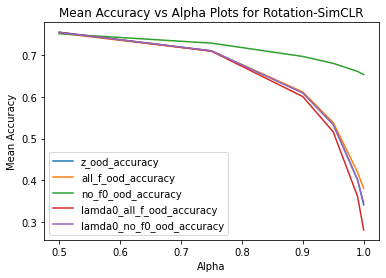

In [7]:
all_f_ood_accuracy = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="rotated"].
                          all_f_ood_accuracy_sp_corr["mean"])
no_f0_ood_accuracy = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="rotated"].
                          no_f0_ood_accuracy_sp_corr["mean"])
z_ood_accuracy = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="rotated"].
                      z_ood_accuracy_sp_corr["mean"])

lamda0_all_f_ood_accuracy = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="rotated"].
                                 all_f_ood_accuracy_sp_corr["mean"])
lamda0_no_f0_ood_accuracy = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="rotated"].
                                 no_f0_ood_accuracy_sp_corr["mean"])


x= summary.alpha.unique()
y = np.array([z_ood_accuracy, all_f_ood_accuracy, no_f0_ood_accuracy, lamda0_all_f_ood_accuracy, lamda0_no_f0_ood_accuracy]).T
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_ylabel("Mean Accuracy")
ax.set_xlabel("Alpha")
ax.legend(["z_ood_accuracy", "all_f_ood_accuracy", "no_f0_ood_accuracy", 'lamda0_all_f_ood_accuracy','lamda0_no_f0_ood_accuracy'])
# ax.set_yscale('log')
ax.set_title("Mean Accuracy vs Alpha Plots for Rotation-SimCLR")
plt.savefig('./regular_plots/rotat-SimCLR.pdf', bbox='tight')


# Error Bar Plot

/tmp/ipykernel_169840/4270531027.py:45: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./error_bar_plots/rotat-SimCLR.pdf', bbox='tight')


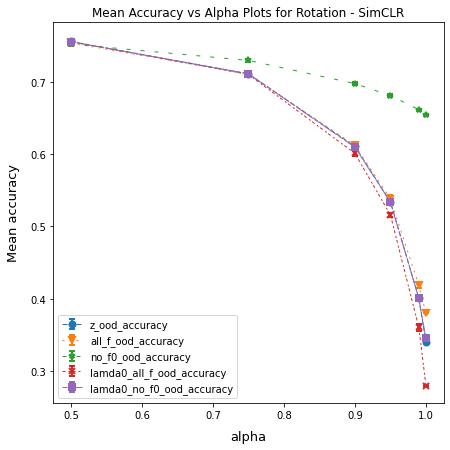

In [8]:
import numpy as np
import matplotlib.pyplot as plt

all_f_ood_accuracy_mean = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="rotated"].all_f_ood_accuracy_sp_corr["mean"])
no_f0_ood_accuracy_mean = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="rotated"].no_f0_ood_accuracy_sp_corr["mean"])
z_ood_accuracy_mean = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="rotated"].z_ood_accuracy_sp_corr["mean"])

lamda0_all_f_ood_accuracy_mean = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="rotated"].all_f_ood_accuracy_sp_corr["mean"])
lamda0_no_f0_ood_accuracy_mean = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="rotated"].no_f0_ood_accuracy_sp_corr["mean"])

all_f_ood_accuracy_std = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="rotated"].all_f_ood_accuracy_sp_corr["std"])
no_f0_ood_accuracy_std = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="rotated"].no_f0_ood_accuracy_sp_corr["std"])
z_ood_accuracy_std = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="rotated"].z_ood_accuracy_sp_corr["std"])

lamda0_all_f_ood_accuracy_std = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="rotated"].all_f_ood_accuracy_sp_corr["std"])
lamda0_no_f0_ood_accuracy_std = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="rotated"].no_f0_ood_accuracy_sp_corr["std"])


x= summary.alpha.unique()
y_means = np.array([z_ood_accuracy_mean, all_f_ood_accuracy_mean, no_f0_ood_accuracy_mean, lamda0_all_f_ood_accuracy_mean, lamda0_no_f0_ood_accuracy_mean])
y_stds = np.array([z_ood_accuracy_std, all_f_ood_accuracy_std, no_f0_ood_accuracy_std, lamda0_all_f_ood_accuracy_std, lamda0_no_f0_ood_accuracy_std])

labels = ["z_ood_accuracy", "all_f_ood_accuracy", "no_f0_ood_accuracy",'lamda0_all_f_ood_accuracy','lamda0_no_f0_ood_accuracy']


colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']
dash_styles = [(5,2),(2,5),(4,10),(3,3,2,2),(5,2,20,2),(5,0)] 
markers = ['o', 'v', '*', 'x', 's','p']
style = {"linewidth":1, "markeredgewidth":2, "elinewidth":2, "capsize":3, "linestyle":'--'}


# fig = plt.figure()
x = summary.alpha.unique()
fig = plt.figure(figsize=(7,7))
for i in range(len(y_means)):
    plt.errorbar(x, y_means[i], yerr=y_stds[i], label=labels[i], dashes=dash_styles[i], marker=markers[i], **style)
plt.legend(loc='lower left')


plt.xlabel(r'alpha', size=13, labelpad=10)
plt.ylabel(r'Mean accuracy', size=13, labelpad=10)
plt.title("Mean Accuracy vs Alpha Plots for Rotation - SimCLR")
# plt.xticks(x_ind, fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('./error_bar_plots/rotat-SimCLR.pdf', bbox='tight')
plt.show()

# Contrast

/tmp/ipykernel_169840/2600768306.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./regular_plots/contr-SimCLR.pdf', bbox='tight')


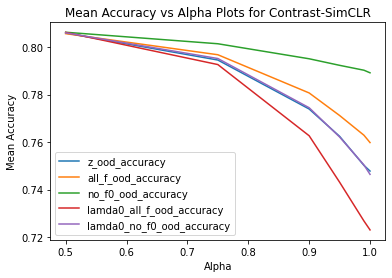

In [9]:
all_f_ood_accuracy = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="contrasted"].
                          all_f_ood_accuracy_sp_corr["mean"])
no_f0_ood_accuracy = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="contrasted"].
                          no_f0_ood_accuracy_sp_corr["mean"])
z_ood_accuracy = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="contrasted"].
                      z_ood_accuracy_sp_corr["mean"])

lamda0_all_f_ood_accuracy = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="contrasted"].
                                 all_f_ood_accuracy_sp_corr["mean"])
lamda0_no_f0_ood_accuracy = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="contrasted"].
                                 no_f0_ood_accuracy_sp_corr["mean"])


x= summary.alpha.unique()
y = np.array([z_ood_accuracy, all_f_ood_accuracy, no_f0_ood_accuracy, lamda0_all_f_ood_accuracy, lamda0_no_f0_ood_accuracy]).T
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_ylabel("Mean Accuracy")
ax.set_xlabel("Alpha")
ax.legend(["z_ood_accuracy", "all_f_ood_accuracy", "no_f0_ood_accuracy", 'lamda0_all_f_ood_accuracy','lamda0_no_f0_ood_accuracy'])
# ax.set_yscale('log')
ax.set_title("Mean Accuracy vs Alpha Plots for Contrast-SimCLR")
plt.savefig('./regular_plots/contr-SimCLR.pdf', bbox='tight')


# Error Bar Plot

/tmp/ipykernel_169840/4069524354.py:45: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./error_bar_plots/contr-SimCLR.pdf', bbox='tight')


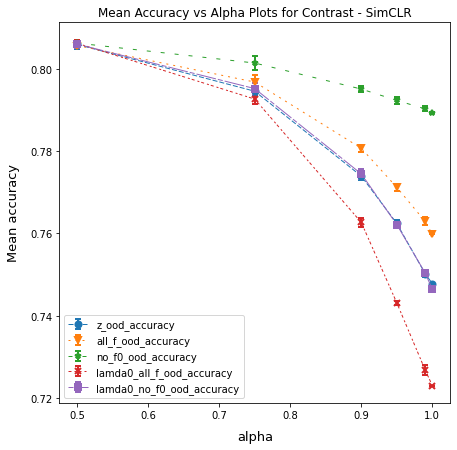

In [10]:
import numpy as np
import matplotlib.pyplot as plt

all_f_ood_accuracy_mean = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="contrasted"].all_f_ood_accuracy_sp_corr["mean"])
no_f0_ood_accuracy_mean = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="contrasted"].no_f0_ood_accuracy_sp_corr["mean"])
z_ood_accuracy_mean = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="contrasted"].z_ood_accuracy_sp_corr["mean"])

lamda0_all_f_ood_accuracy_mean = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="contrasted"].all_f_ood_accuracy_sp_corr["mean"])
lamda0_no_f0_ood_accuracy_mean = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="contrasted"].no_f0_ood_accuracy_sp_corr["mean"])

all_f_ood_accuracy_std = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="contrasted"].all_f_ood_accuracy_sp_corr["std"])
no_f0_ood_accuracy_std = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="contrasted"].no_f0_ood_accuracy_sp_corr["std"])
z_ood_accuracy_std = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="contrasted"].z_ood_accuracy_sp_corr["std"])

lamda0_all_f_ood_accuracy_std = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="contrasted"].all_f_ood_accuracy_sp_corr["std"])
lamda0_no_f0_ood_accuracy_std = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="contrasted"].no_f0_ood_accuracy_sp_corr["std"])


x= summary.alpha.unique()
y_means = np.array([z_ood_accuracy_mean, all_f_ood_accuracy_mean, no_f0_ood_accuracy_mean, lamda0_all_f_ood_accuracy_mean, lamda0_no_f0_ood_accuracy_mean])
y_stds = np.array([z_ood_accuracy_std, all_f_ood_accuracy_std, no_f0_ood_accuracy_std, lamda0_all_f_ood_accuracy_std, lamda0_no_f0_ood_accuracy_std])

labels = ["z_ood_accuracy", "all_f_ood_accuracy", "no_f0_ood_accuracy",'lamda0_all_f_ood_accuracy','lamda0_no_f0_ood_accuracy']


colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']
dash_styles = [(5,2),(2,5),(4,10),(3,3,2,2),(5,2,20,2),(5,0)] 
markers = ['o', 'v', '*', 'x', 's','p']
style = {"linewidth":1, "markeredgewidth":2, "elinewidth":2, "capsize":3, "linestyle":'--'}


# fig = plt.figure()
x = summary.alpha.unique()
fig = plt.figure(figsize=(7,7))
for i in range(len(y_means)):
    plt.errorbar(x, y_means[i], yerr=y_stds[i], label=labels[i], dashes=dash_styles[i], marker=markers[i], **style)
plt.legend(loc='lower left')


plt.xlabel(r'alpha', size=13, labelpad=10)
plt.ylabel(r'Mean accuracy', size=13, labelpad=10)
plt.title("Mean Accuracy vs Alpha Plots for Contrast - SimCLR")
# plt.xticks(x_ind, fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('./error_bar_plots/contr-SimCLR.pdf', bbox='tight')
plt.show()

# Blur

/tmp/ipykernel_169840/3625618845.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./regular_plots/blur-SimCLR.pdf', bbox='tight')


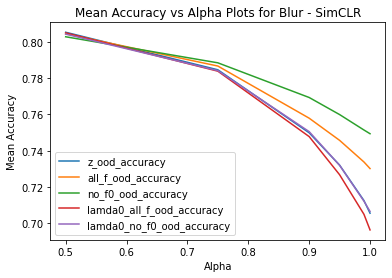

In [11]:
all_f_ood_accuracy = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="blurred"].
                          all_f_ood_accuracy_sp_corr["mean"])
no_f0_ood_accuracy = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="blurred"].
                          no_f0_ood_accuracy_sp_corr["mean"])
z_ood_accuracy = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="blurred"].
                      z_ood_accuracy_sp_corr["mean"])

lamda0_all_f_ood_accuracy = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="blurred"].
                                 all_f_ood_accuracy_sp_corr["mean"])
lamda0_no_f0_ood_accuracy = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="blurred"].
                                 no_f0_ood_accuracy_sp_corr["mean"])


x= summary.alpha.unique()
y = np.array([z_ood_accuracy, all_f_ood_accuracy, no_f0_ood_accuracy, lamda0_all_f_ood_accuracy, lamda0_no_f0_ood_accuracy]).T
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_ylabel("Mean Accuracy")
ax.set_xlabel("Alpha")
ax.legend(["z_ood_accuracy", "all_f_ood_accuracy", "no_f0_ood_accuracy", 'lamda0_all_f_ood_accuracy','lamda0_no_f0_ood_accuracy'])
# ax.set_yscale('log')
ax.set_title("Mean Accuracy vs Alpha Plots for Blur - SimCLR")
plt.savefig('./regular_plots/blur-SimCLR.pdf', bbox='tight')


# Error Bar Plot

/tmp/ipykernel_169840/3732575681.py:45: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./error_bar_plots/blur-SimCLR.pdf', bbox='tight')


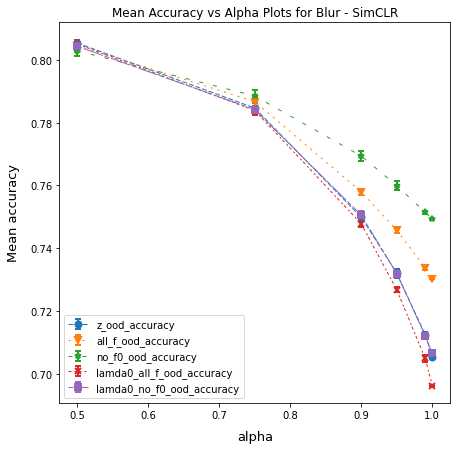

In [12]:
import numpy as np
import matplotlib.pyplot as plt

all_f_ood_accuracy_mean = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="blurred"].all_f_ood_accuracy_sp_corr["mean"])
no_f0_ood_accuracy_mean = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="blurred"].no_f0_ood_accuracy_sp_corr["mean"])
z_ood_accuracy_mean = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="blurred"].z_ood_accuracy_sp_corr["mean"])

lamda0_all_f_ood_accuracy_mean = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="blurred"].all_f_ood_accuracy_sp_corr["mean"])
lamda0_no_f0_ood_accuracy_mean = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="blurred"].no_f0_ood_accuracy_sp_corr["mean"])

all_f_ood_accuracy_std = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="blurred"].all_f_ood_accuracy_sp_corr["std"])
no_f0_ood_accuracy_std = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="blurred"].no_f0_ood_accuracy_sp_corr["std"])
z_ood_accuracy_std = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="blurred"].z_ood_accuracy_sp_corr["std"])

lamda0_all_f_ood_accuracy_std = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="blurred"].all_f_ood_accuracy_sp_corr["std"])
lamda0_no_f0_ood_accuracy_std = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="blurred"].no_f0_ood_accuracy_sp_corr["std"])


x= summary.alpha.unique()
y_means = np.array([z_ood_accuracy_mean, all_f_ood_accuracy_mean, no_f0_ood_accuracy_mean, lamda0_all_f_ood_accuracy_mean, lamda0_no_f0_ood_accuracy_mean])
y_stds = np.array([z_ood_accuracy_std, all_f_ood_accuracy_std, no_f0_ood_accuracy_std, lamda0_all_f_ood_accuracy_std, lamda0_no_f0_ood_accuracy_std])

labels = ["z_ood_accuracy", "all_f_ood_accuracy", "no_f0_ood_accuracy",'lamda0_all_f_ood_accuracy','lamda0_no_f0_ood_accuracy']


colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']
dash_styles = [(5,2),(2,5),(4,10),(3,3,2,2),(5,2,20,2),(5,0)] 
markers = ['o', 'v', '*', 'x', 's','p']
style = {"linewidth":1, "markeredgewidth":2, "elinewidth":2, "capsize":3, "linestyle":'--'}


# fig = plt.figure()
x = summary.alpha.unique()
fig = plt.figure(figsize=(7,7))
for i in range(len(y_means)):
    plt.errorbar(x, y_means[i], yerr=y_stds[i], label=labels[i], dashes=dash_styles[i], marker=markers[i], **style)
plt.legend(loc='lower left')


plt.xlabel(r'alpha', size=13, labelpad=10)
plt.ylabel(r'Mean accuracy', size=13, labelpad=10)
plt.title("Mean Accuracy vs Alpha Plots for Blur - SimCLR")
# plt.xticks(x_ind, fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('./error_bar_plots/blur-SimCLR.pdf', bbox='tight')
plt.show()

# Saturation

/tmp/ipykernel_169840/1996725732.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./regular_plots/sat-SimCLR.pdf', bbox='tight')


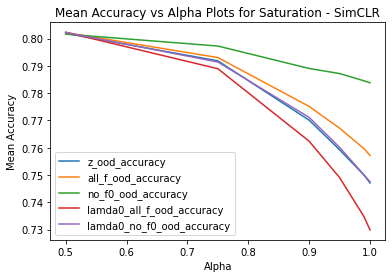

In [13]:
all_f_ood_accuracy = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="saturated"].
                          all_f_ood_accuracy_sp_corr["mean"])
no_f0_ood_accuracy = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="saturated"].
                          no_f0_ood_accuracy_sp_corr["mean"])
z_ood_accuracy = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="saturated"].
                      z_ood_accuracy_sp_corr["mean"])

lamda0_all_f_ood_accuracy = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="saturated"].
                                 all_f_ood_accuracy_sp_corr["mean"])
lamda0_no_f0_ood_accuracy = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="saturated"].
                                 no_f0_ood_accuracy_sp_corr["mean"])


x= summary.alpha.unique()
y = np.array([z_ood_accuracy, all_f_ood_accuracy, no_f0_ood_accuracy, lamda0_all_f_ood_accuracy, lamda0_no_f0_ood_accuracy]).T
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_ylabel("Mean Accuracy")
ax.set_xlabel("Alpha")
ax.legend(["z_ood_accuracy", "all_f_ood_accuracy", "no_f0_ood_accuracy", 'lamda0_all_f_ood_accuracy','lamda0_no_f0_ood_accuracy'])
# ax.set_yscale('log')
ax.set_title("Mean Accuracy vs Alpha Plots for Saturation - SimCLR")
plt.savefig('./regular_plots/sat-SimCLR.pdf', bbox='tight')


# Error Bar Plot

/tmp/ipykernel_169840/99808999.py:45: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./error_bar_plots/sat-SimCLR.pdf', bbox='tight')


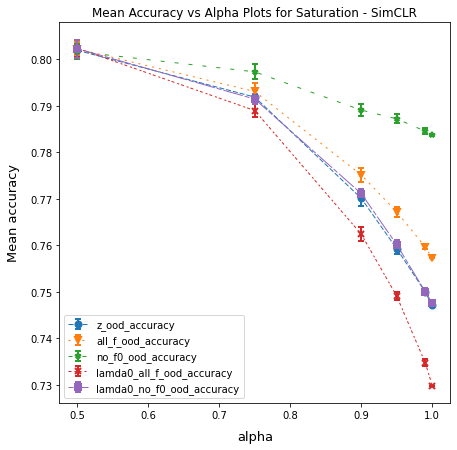

In [14]:
import numpy as np
import matplotlib.pyplot as plt

all_f_ood_accuracy_mean = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="saturated"].all_f_ood_accuracy_sp_corr["mean"])
no_f0_ood_accuracy_mean = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="saturated"].no_f0_ood_accuracy_sp_corr["mean"])
z_ood_accuracy_mean = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="saturated"].z_ood_accuracy_sp_corr["mean"])

lamda0_all_f_ood_accuracy_mean = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="saturated"].all_f_ood_accuracy_sp_corr["mean"])
lamda0_no_f0_ood_accuracy_mean = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="saturated"].no_f0_ood_accuracy_sp_corr["mean"])

all_f_ood_accuracy_std = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="saturated"].all_f_ood_accuracy_sp_corr["std"])
no_f0_ood_accuracy_std = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="saturated"].no_f0_ood_accuracy_sp_corr["std"])
z_ood_accuracy_std = list(simclr_summary_lamda1[simclr_summary_lamda1.transformation_type=="saturated"].z_ood_accuracy_sp_corr["std"])

lamda0_all_f_ood_accuracy_std = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="saturated"].all_f_ood_accuracy_sp_corr["std"])
lamda0_no_f0_ood_accuracy_std = list(simclr_summary_lamda0[simclr_summary_lamda0.transformation_type=="saturated"].no_f0_ood_accuracy_sp_corr["std"])


x= summary.alpha.unique()
y_means = np.array([z_ood_accuracy_mean, all_f_ood_accuracy_mean, no_f0_ood_accuracy_mean, lamda0_all_f_ood_accuracy_mean, lamda0_no_f0_ood_accuracy_mean])
y_stds = np.array([z_ood_accuracy_std, all_f_ood_accuracy_std, no_f0_ood_accuracy_std, lamda0_all_f_ood_accuracy_std, lamda0_no_f0_ood_accuracy_std])

labels = ["z_ood_accuracy", "all_f_ood_accuracy", "no_f0_ood_accuracy",'lamda0_all_f_ood_accuracy','lamda0_no_f0_ood_accuracy']


colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']
dash_styles = [(5,2),(2,5),(4,10),(3,3,2,2),(5,2,20,2),(5,0)] 
markers = ['o', 'v', '*', 'x', 's','p']
style = {"linewidth":1, "markeredgewidth":2, "elinewidth":2, "capsize":3, "linestyle":'--'}


# fig = plt.figure()
x = summary.alpha.unique()
fig = plt.figure(figsize=(7,7))
for i in range(len(y_means)):
    plt.errorbar(x, y_means[i], yerr=y_stds[i], label=labels[i], dashes=dash_styles[i], marker=markers[i], **style)
plt.legend(loc='lower left')


plt.xlabel(r'alpha', size=13, labelpad=10)
plt.ylabel(r'Mean accuracy', size=13, labelpad=10)
plt.title("Mean Accuracy vs Alpha Plots for Saturation - SimCLR")
# plt.xticks(x_ind, fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('./error_bar_plots/sat-SimCLR.pdf', bbox='tight')
plt.show()



# Plots for Results on Resnet Features

# Rotation

/tmp/ipykernel_169840/3139968708.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./regular_plots/rotat-ResNet.pdf', bbox='tight')


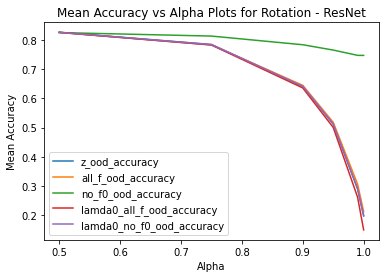

In [15]:
all_f_ood_accuracy = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="rotated"].all_f_ood_accuracy_sp_corr["mean"])
no_f0_ood_accuracy = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="rotated"].no_f0_ood_accuracy_sp_corr["mean"])
z_ood_accuracy = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="rotated"].z_ood_accuracy_sp_corr["mean"])

lamda0_all_f_ood_accuracy = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="rotated"].all_f_ood_accuracy_sp_corr["mean"])
lamda0_no_f0_ood_accuracy = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="rotated"].no_f0_ood_accuracy_sp_corr["mean"])


x= summary.alpha.unique()
y = np.array([z_ood_accuracy, all_f_ood_accuracy, no_f0_ood_accuracy, lamda0_all_f_ood_accuracy, lamda0_no_f0_ood_accuracy]).T
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_ylabel("Mean Accuracy")
ax.set_xlabel("Alpha")
ax.legend(["z_ood_accuracy", "all_f_ood_accuracy", "no_f0_ood_accuracy", 'lamda0_all_f_ood_accuracy','lamda0_no_f0_ood_accuracy'])
# ax.set_yscale('log')
ax.set_title("Mean Accuracy vs Alpha Plots for Rotation - ResNet")
plt.savefig('./regular_plots/rotat-ResNet.pdf', bbox='tight')

# Error Bar Plot

/tmp/ipykernel_169840/803782045.py:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./error_bar_plots/rotat-ResNet.pdf', bbox='tight')


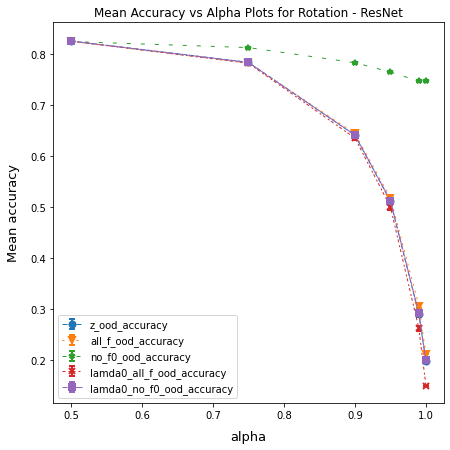

In [16]:
import numpy as np
import matplotlib.pyplot as plt

all_f_ood_accuracy_mean = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="rotated"].all_f_ood_accuracy_sp_corr["mean"])
no_f0_ood_accuracy_mean = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="rotated"].no_f0_ood_accuracy_sp_corr["mean"])
z_ood_accuracy_mean = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="rotated"].z_ood_accuracy_sp_corr["mean"])

lamda0_all_f_ood_accuracy_mean = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="rotated"].all_f_ood_accuracy_sp_corr["mean"])
lamda0_no_f0_ood_accuracy_mean = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="rotated"].no_f0_ood_accuracy_sp_corr["mean"])

all_f_ood_accuracy_std = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="rotated"].all_f_ood_accuracy_sp_corr["std"])
no_f0_ood_accuracy_std = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="rotated"].no_f0_ood_accuracy_sp_corr["std"])
z_ood_accuracy_std = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="rotated"].z_ood_accuracy_sp_corr["std"])

lamda0_all_f_ood_accuracy_std = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="rotated"].all_f_ood_accuracy_sp_corr["std"])
lamda0_no_f0_ood_accuracy_std = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="rotated"].no_f0_ood_accuracy_sp_corr["std"])


x= summary.alpha.unique()
y_means = np.array([z_ood_accuracy_mean, all_f_ood_accuracy_mean, no_f0_ood_accuracy_mean, lamda0_all_f_ood_accuracy_mean, lamda0_no_f0_ood_accuracy_mean])
y_stds = np.array([z_ood_accuracy_std, all_f_ood_accuracy_std, no_f0_ood_accuracy_std, lamda0_all_f_ood_accuracy_std, lamda0_no_f0_ood_accuracy_std])

labels = ["z_ood_accuracy", "all_f_ood_accuracy", "no_f0_ood_accuracy",'lamda0_all_f_ood_accuracy','lamda0_no_f0_ood_accuracy']


colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']
dash_styles = [(5,2),(2,5),(4,10),(3,3,2,2),(5,2,20,2),(5,0)] 
markers = ['o', 'v', '*', 'x', 's','p']
style = {"linewidth":1, "markeredgewidth":2, "elinewidth":2, "capsize":3, "linestyle":'--'}


# fig = plt.figure()
x = summary.alpha.unique()
fig = plt.figure(figsize=(7,7))
for i in range(len(y_means)):
    plt.errorbar(x, y_means[i], yerr=y_stds[i], label=labels[i], dashes=dash_styles[i], marker=markers[i], **style)
plt.legend(loc='lower left')



plt.xlabel(r'alpha', size=13, labelpad=10)
plt.ylabel(r'Mean accuracy', size=13, labelpad=10)
plt.title("Mean Accuracy vs Alpha Plots for Rotation - ResNet")
# plt.xticks(x_ind, fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('./error_bar_plots/rotat-ResNet.pdf', bbox='tight')
plt.show()

# Contrast

/tmp/ipykernel_169840/3208763507.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./regular_plots/contr-ResNet.pdf', bbox='tight')


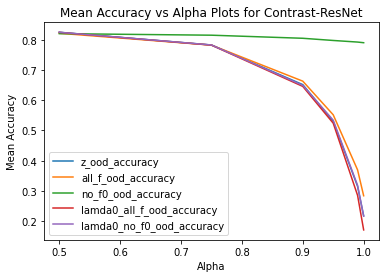

In [17]:
all_f_ood_accuracy = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="contrasted"].all_f_ood_accuracy_sp_corr["mean"])
no_f0_ood_accuracy = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="contrasted"].no_f0_ood_accuracy_sp_corr["mean"])
z_ood_accuracy = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="contrasted"].z_ood_accuracy_sp_corr["mean"])

lamda0_all_f_ood_accuracy = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="contrasted"].all_f_ood_accuracy_sp_corr["mean"])
lamda0_no_f0_ood_accuracy = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="contrasted"].no_f0_ood_accuracy_sp_corr["mean"])


x= summary.alpha.unique()
y = np.array([z_ood_accuracy, all_f_ood_accuracy, no_f0_ood_accuracy, lamda0_all_f_ood_accuracy, lamda0_no_f0_ood_accuracy]).T
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_ylabel("Mean Accuracy")
ax.set_xlabel("Alpha")
ax.legend(["z_ood_accuracy", "all_f_ood_accuracy", "no_f0_ood_accuracy", 'lamda0_all_f_ood_accuracy','lamda0_no_f0_ood_accuracy'])
# ax.set_yscale('log')
ax.set_title("Mean Accuracy vs Alpha Plots for Contrast-ResNet")
plt.savefig('./regular_plots/contr-ResNet.pdf', bbox='tight')

# Error Bar Plot

/tmp/ipykernel_169840/2106155374.py:45: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./error_bar_plots/contr-ResNet.pdf', bbox='tight')


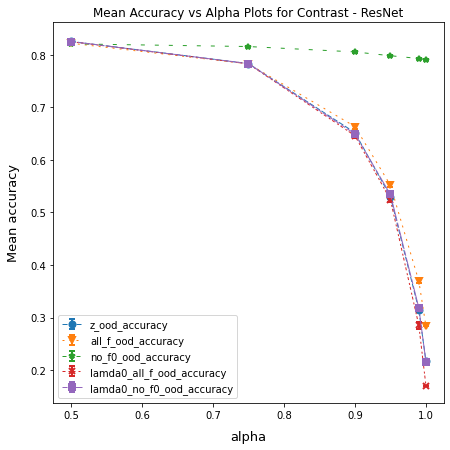

In [18]:
import numpy as np
import matplotlib.pyplot as plt

all_f_ood_accuracy_mean = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="contrasted"].all_f_ood_accuracy_sp_corr["mean"])
no_f0_ood_accuracy_mean = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="contrasted"].no_f0_ood_accuracy_sp_corr["mean"])
z_ood_accuracy_mean = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="contrasted"].z_ood_accuracy_sp_corr["mean"])

lamda0_all_f_ood_accuracy_mean = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="contrasted"].all_f_ood_accuracy_sp_corr["mean"])
lamda0_no_f0_ood_accuracy_mean = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="contrasted"].no_f0_ood_accuracy_sp_corr["mean"])

all_f_ood_accuracy_std = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="contrasted"].all_f_ood_accuracy_sp_corr["std"])
no_f0_ood_accuracy_std = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="contrasted"].no_f0_ood_accuracy_sp_corr["std"])
z_ood_accuracy_std = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="contrasted"].z_ood_accuracy_sp_corr["std"])

lamda0_all_f_ood_accuracy_std = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="contrasted"].all_f_ood_accuracy_sp_corr["std"])
lamda0_no_f0_ood_accuracy_std = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="contrasted"].no_f0_ood_accuracy_sp_corr["std"])


x= summary.alpha.unique()
y_means = np.array([z_ood_accuracy_mean, all_f_ood_accuracy_mean, no_f0_ood_accuracy_mean, lamda0_all_f_ood_accuracy_mean, lamda0_no_f0_ood_accuracy_mean])
y_stds = np.array([z_ood_accuracy_std, all_f_ood_accuracy_std, no_f0_ood_accuracy_std, lamda0_all_f_ood_accuracy_std, lamda0_no_f0_ood_accuracy_std])

labels = ["z_ood_accuracy", "all_f_ood_accuracy", "no_f0_ood_accuracy",'lamda0_all_f_ood_accuracy','lamda0_no_f0_ood_accuracy']


colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']
dash_styles = [(5,2),(2,5),(4,10),(3,3,2,2),(5,2,20,2),(5,0)] 
markers = ['o', 'v', '*', 'x', 's','p']
style = {"linewidth":1, "markeredgewidth":2, "elinewidth":2, "capsize":3, "linestyle":'--'}


# fig = plt.figure()
x = summary.alpha.unique()
fig = plt.figure(figsize=(7,7))
for i in range(len(y_means)):
    plt.errorbar(x, y_means[i], yerr=y_stds[i], label=labels[i], dashes=dash_styles[i], marker=markers[i], **style)
plt.legend(loc='lower left')


plt.xlabel(r'alpha', size=13, labelpad=10)
plt.ylabel(r'Mean accuracy', size=13, labelpad=10)
plt.title("Mean Accuracy vs Alpha Plots for Contrast - ResNet")
# plt.xticks(x_ind, fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('./error_bar_plots/contr-ResNet.pdf', bbox='tight')
plt.show()

# Blur

/tmp/ipykernel_169840/3142656554.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./regular_plots/blur-ResNet.pdf', bbox='tight')


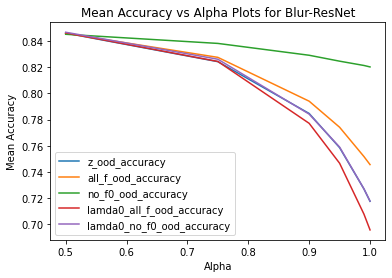

In [19]:
all_f_ood_accuracy = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="blurred"].all_f_ood_accuracy_sp_corr["mean"])
no_f0_ood_accuracy = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="blurred"].no_f0_ood_accuracy_sp_corr["mean"])
z_ood_accuracy = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="blurred"].z_ood_accuracy_sp_corr["mean"])

lamda0_all_f_ood_accuracy = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="blurred"].all_f_ood_accuracy_sp_corr["mean"])
lamda0_no_f0_ood_accuracy = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="blurred"].no_f0_ood_accuracy_sp_corr["mean"])


x= summary.alpha.unique()
y = np.array([z_ood_accuracy, all_f_ood_accuracy, no_f0_ood_accuracy, lamda0_all_f_ood_accuracy, lamda0_no_f0_ood_accuracy]).T
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_ylabel("Mean Accuracy")
ax.set_xlabel("Alpha")
ax.legend(["z_ood_accuracy", "all_f_ood_accuracy", "no_f0_ood_accuracy", 'lamda0_all_f_ood_accuracy','lamda0_no_f0_ood_accuracy'])
# ax.set_yscale('log')
ax.set_title("Mean Accuracy vs Alpha Plots for Blur-ResNet")
plt.savefig('./regular_plots/blur-ResNet.pdf', bbox='tight')

# Error Bar Plot

/tmp/ipykernel_169840/2975681150.py:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./error_bar_plots/blur-ResNet.pdf', bbox='tight')


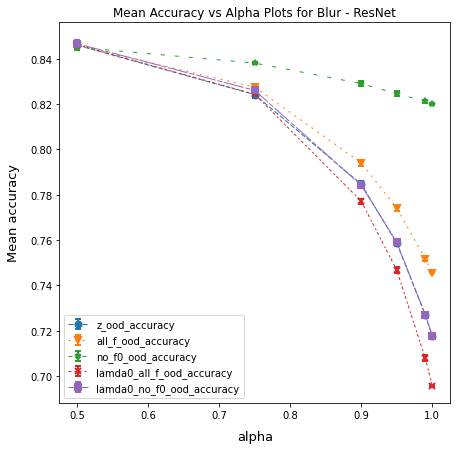

In [20]:
import numpy as np
import matplotlib.pyplot as plt

all_f_ood_accuracy_mean = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="blurred"].all_f_ood_accuracy_sp_corr["mean"])
no_f0_ood_accuracy_mean = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="blurred"].no_f0_ood_accuracy_sp_corr["mean"])
z_ood_accuracy_mean = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="blurred"].z_ood_accuracy_sp_corr["mean"])

lamda0_all_f_ood_accuracy_mean = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="blurred"].all_f_ood_accuracy_sp_corr["mean"])
lamda0_no_f0_ood_accuracy_mean = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="blurred"].no_f0_ood_accuracy_sp_corr["mean"])

all_f_ood_accuracy_std = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="blurred"].all_f_ood_accuracy_sp_corr["std"])
no_f0_ood_accuracy_std = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="blurred"].no_f0_ood_accuracy_sp_corr["std"])
z_ood_accuracy_std = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="blurred"].z_ood_accuracy_sp_corr["std"])

lamda0_all_f_ood_accuracy_std = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="blurred"].all_f_ood_accuracy_sp_corr["std"])
lamda0_no_f0_ood_accuracy_std = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="blurred"].no_f0_ood_accuracy_sp_corr["std"])


x= summary.alpha.unique()
y_means = np.array([z_ood_accuracy_mean, all_f_ood_accuracy_mean, no_f0_ood_accuracy_mean, lamda0_all_f_ood_accuracy_mean, lamda0_no_f0_ood_accuracy_mean])
y_stds = np.array([z_ood_accuracy_std, all_f_ood_accuracy_std, no_f0_ood_accuracy_std, lamda0_all_f_ood_accuracy_std, lamda0_no_f0_ood_accuracy_std])

labels = ["z_ood_accuracy", "all_f_ood_accuracy", "no_f0_ood_accuracy",'lamda0_all_f_ood_accuracy','lamda0_no_f0_ood_accuracy']


colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']
dash_styles = [(5,2),(2,5),(4,10),(3,3,2,2),(5,2,20,2),(5,0)] 
markers = ['o', 'v', '*', 'x', 's','p']
style = {"linewidth":1, "markeredgewidth":2, "elinewidth":2, "capsize":3, "linestyle":'--'}


# fig = plt.figure()
x = summary.alpha.unique()
fig = plt.figure(figsize=(7,7))
for i in range(len(y_means)):
    plt.errorbar(x, y_means[i], yerr=y_stds[i], label=labels[i], dashes=dash_styles[i], marker=markers[i], **style)
plt.legend(loc='lower left')

plt.xlabel(r'alpha', size=13, labelpad=10)
plt.ylabel(r'Mean accuracy', size=13, labelpad=10)
plt.title("Mean Accuracy vs Alpha Plots for Blur - ResNet")
# plt.xticks(x_ind, fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('./error_bar_plots/blur-ResNet.pdf', bbox='tight')
plt.show()

# Saturation

/tmp/ipykernel_169840/3123586062.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./regular_plots/sat-ResNet.pdf', bbox='tight')


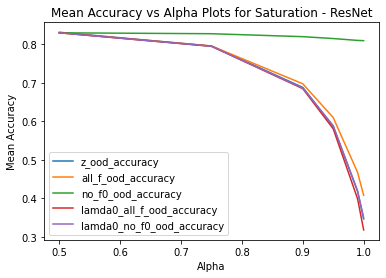

In [21]:
all_f_ood_accuracy = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="saturated"].all_f_ood_accuracy_sp_corr["mean"])
no_f0_ood_accuracy = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="saturated"].no_f0_ood_accuracy_sp_corr["mean"])
z_ood_accuracy = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="saturated"].z_ood_accuracy_sp_corr["mean"])

lamda0_all_f_ood_accuracy = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="saturated"].all_f_ood_accuracy_sp_corr["mean"])
lamda0_no_f0_ood_accuracy = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="saturated"].no_f0_ood_accuracy_sp_corr["mean"])


x= summary.alpha.unique()
y = np.array([z_ood_accuracy, all_f_ood_accuracy, no_f0_ood_accuracy, lamda0_all_f_ood_accuracy, lamda0_no_f0_ood_accuracy]).T
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_ylabel("Mean Accuracy")
ax.set_xlabel("Alpha")
ax.legend(["z_ood_accuracy", "all_f_ood_accuracy", "no_f0_ood_accuracy", 'lamda0_all_f_ood_accuracy','lamda0_no_f0_ood_accuracy'])
# ax.set_yscale('log')
ax.set_title("Mean Accuracy vs Alpha Plots for Saturation - ResNet")
plt.savefig('./regular_plots/sat-ResNet.pdf', bbox='tight')

# Error bar plot

/tmp/ipykernel_169840/729842098.py:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./error_bar_plots/sat-ResNet.pdf', bbox='tight')


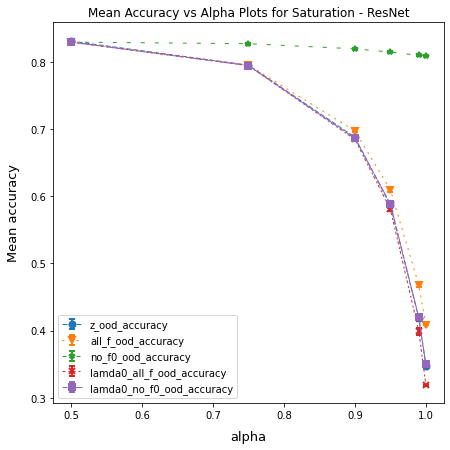

In [22]:
import numpy as np
import matplotlib.pyplot as plt

all_f_ood_accuracy_mean = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="saturated"].all_f_ood_accuracy_sp_corr["mean"])
no_f0_ood_accuracy_mean = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="saturated"].no_f0_ood_accuracy_sp_corr["mean"])
z_ood_accuracy_mean = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="saturated"].z_ood_accuracy_sp_corr["mean"])

lamda0_all_f_ood_accuracy_mean = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="saturated"].all_f_ood_accuracy_sp_corr["mean"])
lamda0_no_f0_ood_accuracy_mean = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="saturated"].no_f0_ood_accuracy_sp_corr["mean"])

all_f_ood_accuracy_std = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="saturated"].all_f_ood_accuracy_sp_corr["std"])
no_f0_ood_accuracy_std = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="saturated"].no_f0_ood_accuracy_sp_corr["std"])
z_ood_accuracy_std = list(resnet_summary_lamda1[resnet_summary_lamda1.transformation_type=="saturated"].z_ood_accuracy_sp_corr["std"])

lamda0_all_f_ood_accuracy_std = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="saturated"].all_f_ood_accuracy_sp_corr["std"])
lamda0_no_f0_ood_accuracy_std = list(resnet_summary_lamda0[resnet_summary_lamda0.transformation_type=="saturated"].no_f0_ood_accuracy_sp_corr["std"])


x= summary.alpha.unique()
y_means = np.array([z_ood_accuracy_mean, all_f_ood_accuracy_mean, no_f0_ood_accuracy_mean, lamda0_all_f_ood_accuracy_mean, lamda0_no_f0_ood_accuracy_mean])
y_stds = np.array([z_ood_accuracy_std, all_f_ood_accuracy_std, no_f0_ood_accuracy_std, lamda0_all_f_ood_accuracy_std, lamda0_no_f0_ood_accuracy_std])

labels = ["z_ood_accuracy", "all_f_ood_accuracy", "no_f0_ood_accuracy",'lamda0_all_f_ood_accuracy','lamda0_no_f0_ood_accuracy']


colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink']
dash_styles = [(5,2),(2,5),(4,10),(3,3,2,2),(5,2,20,2),(5,0)] 
markers = ['o', 'v', '*', 'x', 's','p']
style = {"linewidth":1, "markeredgewidth":2, "elinewidth":2, "capsize":3, "linestyle":'--'}


# fig = plt.figure()
x = summary.alpha.unique()
fig = plt.figure(figsize=(7,7))
for i in range(len(y_means)):
    plt.errorbar(x, y_means[i], yerr=y_stds[i], label=labels[i], dashes=dash_styles[i], marker=markers[i], **style)
plt.legend(loc='lower left')

plt.xlabel(r'alpha', size=13, labelpad=10)
plt.ylabel(r'Mean accuracy', size=13, labelpad=10)
plt.title("Mean Accuracy vs Alpha Plots for Saturation - ResNet")
# plt.xticks(x_ind, fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('./error_bar_plots/sat-ResNet.pdf', bbox='tight')
plt.show()